In [1]:
import pandas as pd

# Remplace 'nom_du_fichier.csv' par le chemin réel de ton fichier CSV
chemin_fichier = 'flickr_data2.csv'

# Lecture du fichier CSV
try:
    data = pd.read_csv(chemin_fichier, sep=',')
    print("Fichier importé avec succès !")
except Exception as e:
    print(f"Une erreur est survenue : {e}")

Fichier importé avec succès !


/var/folders/r2/gpm53c192dsgzq8bxk_h_nph0000gn/T/ipykernel_89353/2091030073.py:8: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(chemin_fichier, sep=',')


In [2]:
print("### Informations générales sur le dataset ###")
print(data.info())

# Nombre total de lignes et colonnes
print("\nNombre total de lignes et colonnes :")
print(f"Lignes : {data.shape[0]}, Colonnes : {data.shape[1]}")

# Statistiques descriptives
print("\n### Statistiques descriptives ###")
#print(data.describe(include='all'))  # Inclut toutes les colonnes

# Comptage des valeurs nulles par colonne
print("\n### Nombre de valeurs nulles par colonne ###")
print(data.isnull().sum())

# Pourcentage de valeurs nulles
print("\n### Pourcentage de valeurs nulles par colonne ###")
print((data.isnull().sum() / data.shape[0]) * 100)

# Détection des doublons
print("\n### Nombre de doublons ###")
print(data.duplicated().sum())

# Aperçu des premières lignes
print("\n### Aperçu des premières lignes ###")
print(data.head())


### Informations générales sur le dataset ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420240 entries, 0 to 420239
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   420240 non-null  int64  
 1    user                420240 non-null  object 
 2    lat                 420240 non-null  float64
 3    long                420240 non-null  float64
 4    tags                316730 non-null  object 
 5    title               381911 non-null  object 
 6    date_taken_minute   420239 non-null  float64
 7    date_taken_hour     420240 non-null  int64  
 8    date_taken_day      420240 non-null  int64  
 9    date_taken_month    420240 non-null  int64  
 10   date_taken_year     420240 non-null  int64  
 11   date_upload_minute  420228 non-null  object 
 12   date_upload_hour    420238 non-null  object 
 13   date_upload_day     420238 non-null  float64
 14   date_upload_month   4

In [25]:

try:
    # Suppression des doublons sur toutes les colonnes
    data_sans_doublons = data.drop_duplicates()
    print("Les doublons ont été supprimés du dataset.")

    # Identifier les 3 dernières colonnes
    dernieres_colonnes = data_sans_doublons.columns[-3:]  # Noms des 3 dernières colonnes
    print("### Les 3 dernières colonnes identifiées sont : ###")
    print(dernieres_colonnes)

    # Filtrer les lignes où au moins une des 3 dernières colonnes contient une valeur non nulle
    lignes_problemes = data_sans_doublons[dernieres_colonnes].notnull().any(axis=1)

    lignes_problemes_df = data_sans_doublons[lignes_problemes]

    lignes_problemes_df['title_date_concat'] = (
    lignes_problemes_df[' title'].astype(str) + '_:' + lignes_problemes_df[' date_upload_minute'].astype(str)
    )
    # Réassigner les colonnes en utilisant .loc
    lignes_problemes_df.loc[:, ' date_upload_minute'] = lignes_problemes_df[' date_upload_hour']
    lignes_problemes_df.loc[:, ' date_upload_hour'] = lignes_problemes_df[' date_upload_day']
    lignes_problemes_df.loc[:, ' date_upload_day'] = lignes_problemes_df[' date_upload_month']
    lignes_problemes_df.loc[:, ' date_upload_month'] = lignes_problemes_df[' date_upload_year']
    lignes_problemes_df.loc[:, ' date_upload_year'] = lignes_problemes_df['Unnamed: 16']
    lignes_problemes_df.loc[:, ' title'] = lignes_problemes_df['title_date_concat']

    lignes_problemes_df['annee'] = lignes_problemes_df[' date_taken_minute']
    lignes_problemes_df.loc[:, ' date_taken_minute'] = lignes_problemes_df[' date_taken_hour']
    lignes_problemes_df.loc[:,' date_taken_hour'] = lignes_problemes_df[' date_taken_day']
    lignes_problemes_df.loc[:,' date_taken_day'] = lignes_problemes_df[' date_taken_month']
    lignes_problemes_df.loc[:,' date_taken_month'] = lignes_problemes_df[' date_taken_year']
    lignes_problemes_df.loc[:,' date_taken_year'] = lignes_problemes_df['annee']

    lignes_problemes_df.drop(columns=['annee', 'title_date_concat', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18' ], inplace=True)

    # Liste des IDs à supprimer
    ids_a_supprimer = [8744184885, 8715425964]

    # Suppression des lignes correspondant aux IDs spécifiés
    lignes_problemes_df = lignes_problemes_df[~lignes_problemes_df['id'].isin(ids_a_supprimer)]

except Exception as e:
    print(f"Une erreur est survenue : {e}")


Les doublons ont été supprimés du dataset.
### Les 3 dernières colonnes identifiées sont : ###
Index(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'], dtype='object')


/var/folders/r2/gpm53c192dsgzq8bxk_h_nph0000gn/T/ipykernel_89353/2207322591.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lignes_problemes_df['title_date_concat'] = (
/var/folders/r2/gpm53c192dsgzq8bxk_h_nph0000gn/T/ipykernel_89353/2207322591.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lignes_problemes_df['annee'] = lignes_problemes_df[' date_taken_minute']
/var/folders/r2/gpm53c192dsgzq8bxk_h_nph0000gn/T/ipykernel_89353/2207322591.py:34: SettingWithCopyWarning: 
A value is trying to be set 

In [26]:
print(lignes_problemes_df.columns)

Index(['id', ' user', ' lat', ' long', ' tags', ' title', ' date_taken_minute',
       ' date_taken_hour', ' date_taken_day', ' date_taken_month',
       ' date_taken_year', ' date_upload_minute', ' date_upload_hour',
       ' date_upload_day', ' date_upload_month', ' date_upload_year'],
      dtype='object')


In [27]:
ids_problemes = lignes_problemes_df['id'].tolist()  # Liste des IDs corrigés
df_base = data_sans_doublons[~data_sans_doublons['id'].isin(ids_problemes)]
df_base.drop(columns=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18' ], inplace=True)
# Ajouter les lignes corrigées au DataFrame de base
df_base = pd.concat([df_base, lignes_problemes_df], ignore_index=True)


/var/folders/r2/gpm53c192dsgzq8bxk_h_nph0000gn/T/ipykernel_89353/1733496353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base.drop(columns=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18' ], inplace=True)


In [40]:
print("### Informations générales sur le dataset ###")
print(df_base.info())

# Nombre total de lignes et colonnes
print("\nNombre total de lignes et colonnes :")
print(f"Lignes : {df_base.shape[0]}, Colonnes : {df_base.shape[1]}")

# Statistiques descriptives
print("\n### Statistiques descriptives ###")
#print(data.describe(include='all'))  # Inclut toutes les colonnes

# Comptage des valeurs nulles par colonne
print("\n### Nombre de valeurs nulles par colonne ###")
print(df_base.isnull().sum())

# Pourcentage de valeurs nulles
print("\n### Pourcentage de valeurs nulles par colonne ###")
print((df_base.isnull().sum() / df_base.shape[0]) * 100)

# Détection des doublons
print("\n### Nombre de doublons ###")
print(df_base.duplicated().sum())

# Aperçu des premières lignes
print("\n### Aperçu des premières lignes ###")
print(df_base.head())

### Informations générales sur le dataset ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187593 entries, 0 to 187592
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   187593 non-null  int64  
 1    user                187593 non-null  object 
 2    lat                 187593 non-null  float64
 3    long                187593 non-null  float64
 4    tags                140629 non-null  object 
 5    title               170630 non-null  object 
 6    date_taken_minute   187593 non-null  float64
 7    date_taken_hour     187593 non-null  int64  
 8    date_taken_day      187593 non-null  int64  
 9    date_taken_month    187593 non-null  int64  
 10   date_taken_year     187592 non-null  float64
 11   date_upload_minute  187591 non-null  object 
 12   date_upload_hour    187592 non-null  object 
 13   date_upload_day     187592 non-null  float64
 14   date_upload_month   1

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Appliquer DBSCAN
def perform_dbscan_analysis(data, eps, min_samples):
    features = data[[" lat", " long"]]
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(features)
    data["cluster"] = labels

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    print(f"Nombre de clusters détectés : {n_clusters}")
    print(f"Nombre de points isolés (bruit) : {n_noise}")

    return data


# Récursivement subdiviser le plus grand cluster
def subdivide_largest_cluster(data, eps, min_samples):
    largest_cluster = data[data["cluster"] != -1]["cluster"].value_counts().idxmax()
    print(f"Subdivising cluster {largest_cluster}...")

    largest_cluster_points = data[data["cluster"] == largest_cluster]

    # Apply DBSCAN to the largest cluster
    refined_cluster_data = perform_dbscan_analysis(
        largest_cluster_points.copy(), eps=eps, min_samples=min_samples
    )

    # Update the cluster IDs to avoid overlap
    max_cluster_id = data["cluster"].max()
    refined_cluster_data["cluster"] = refined_cluster_data["cluster"].apply(
        lambda x: x + max_cluster_id + 1 if x != -1 else -1
    )

    # Merge back refined clusters
    data.loc[data["cluster"] == largest_cluster, "cluster"] = (
        -1
    )  # Mark old cluster as noise
    data = pd.concat([data, refined_cluster_data])

    return data


# Visualiser les clusters avec des couleurs correctes
def plot_clusters_with_matplotlib(data):
    plt.figure(figsize=(10, 8))

    # Map unique cluster IDs to consistent colors
    unique_clusters = sorted(data["cluster"].unique())
    cluster_color_map = {
        cluster: plt.get_cmap("tab20")(idx % 20)
        for idx, cluster in enumerate(unique_clusters)
    }

    for cluster in unique_clusters:
        cluster_points = data[data["cluster"] == cluster]

        # Assign colors to clusters, noise gets black
        color = cluster_color_map[cluster] if cluster != -1 else "black"

        plt.scatter(
            cluster_points[" long"],
            cluster_points[" lat"],
            s=20,
            c=[color],
            label=f"Cluster {cluster}" if cluster != -1 else "Noise",
        )

    plt.title("Visualisation des clusters DBSCAN")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend(loc="best", fontsize="small", bbox_to_anchor=(1.05, 1))
    plt.grid()
    plt.show()


# Remove noise from the data
def remove_noise(data):
    filtered_data = data[data["cluster"] != -1]
    print(f"Data after removing noise: {filtered_data.shape[0]} rows.")
    return filtered_data


Nombre de clusters détectés : 56
Nombre de points isolés (bruit) : 88


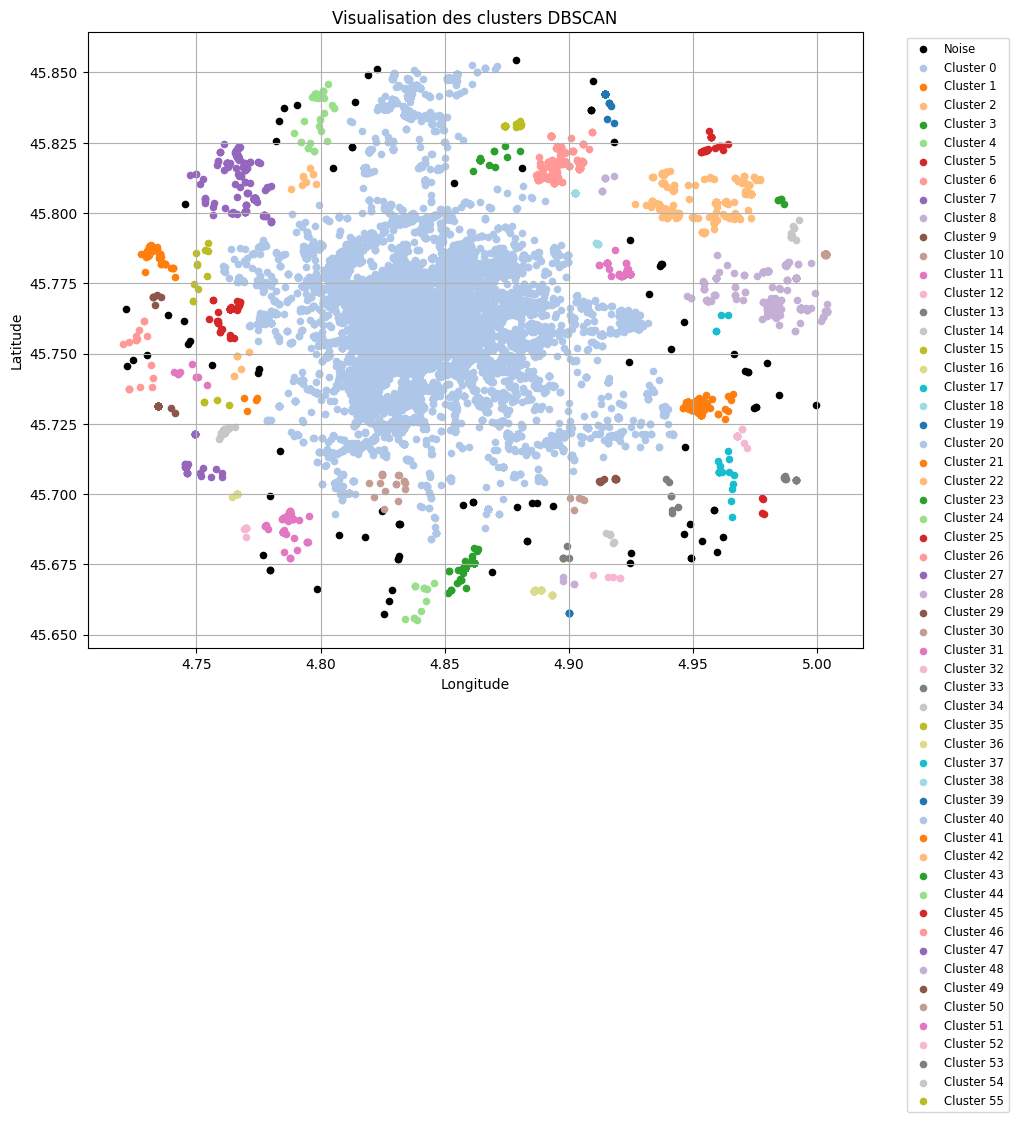

Subdivising cluster 0...
Nombre de clusters détectés : 365
Nombre de points isolés (bruit) : 1083
Subdivising cluster 57...
Nombre de clusters détectés : 172
Nombre de points isolés (bruit) : 391


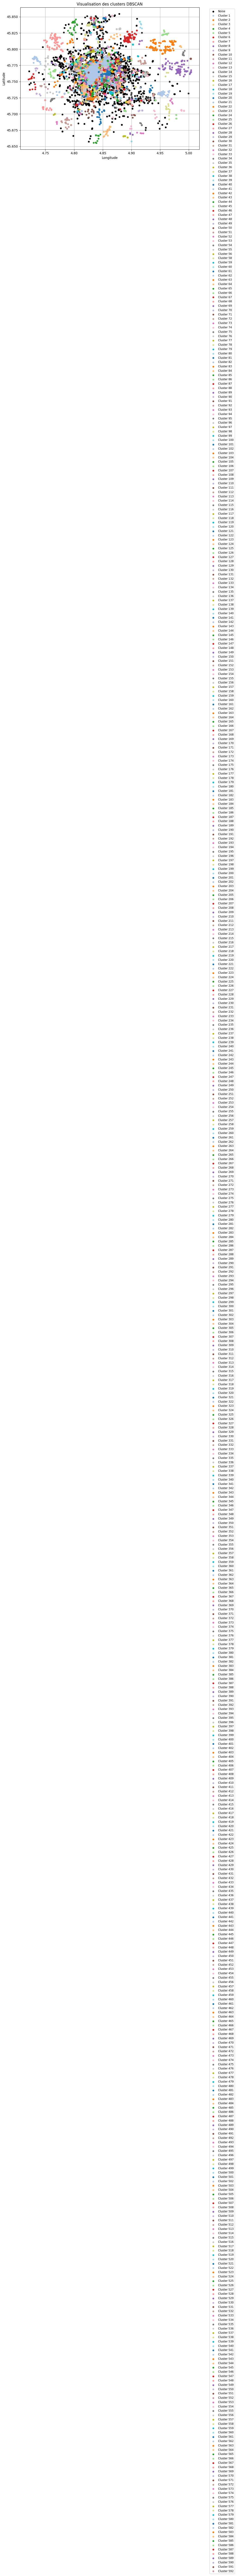

Data after removing noise: 98438 rows.


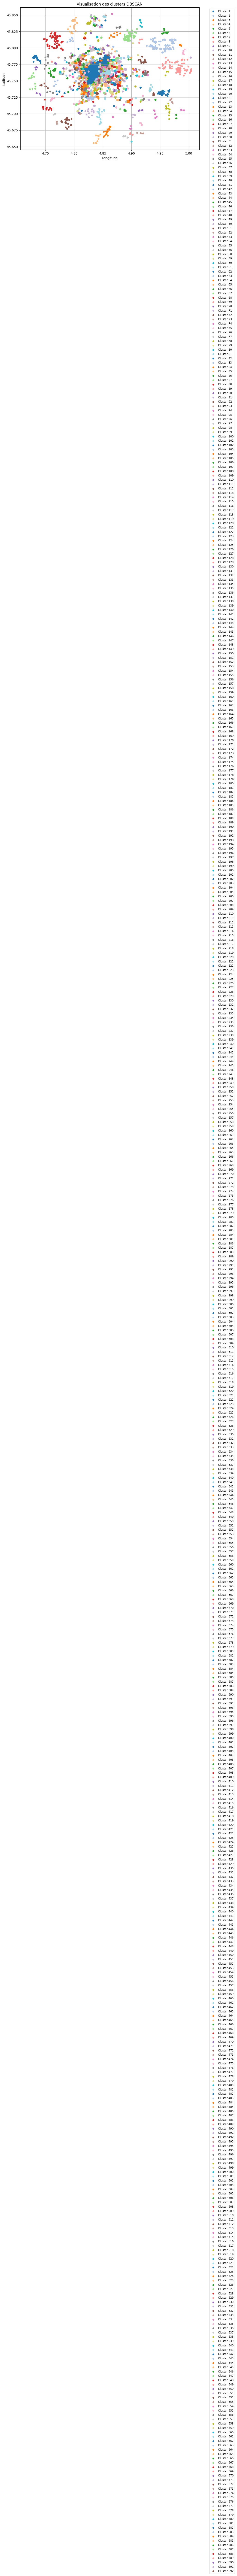

In [30]:

df_sample = df_base.sample(100000)


if df_sample is not None:
    # Perform initial DBSCAN
    clustered_data = perform_dbscan_analysis(df_sample, eps=0.0061, min_samples=4)

    # Plot initial clusters
    plot_clusters_with_matplotlib(clustered_data)

    # Subdivide the largest clusters
    clustered_data = subdivide_largest_cluster(
        clustered_data, eps=0.001, min_samples=4
    )
    clustered_data = subdivide_largest_cluster(
        clustered_data, eps=0.0006, min_samples=4
    )

    # Plot clusters after subdivision
    plot_clusters_with_matplotlib(clustered_data)

    # # Save clustered data
    # clustered_data.to_csv(output_file_path_clusters, index=False)
    # print(f"Clustered data saved to {output_file_path_clusters}")

    clustered_data_no_noise = remove_noise(clustered_data)
    
    # # Remove noise and save
    # clustered_data_no_noise.to_csv(output_file_path_no_noise, index=False)
    # print(f"Clustered data without noise saved to {output_file_path_no_noise}")

    # Plot clusters without noise
    plot_clusters_with_matplotlib(clustered_data_no_noise)


In [31]:
# Statistiques sur les clusters
print("\n### Statistiques des clusters : ###")
clusters_statistiques = df_sample['cluster'].value_counts().sort_values(ascending=False)

# Affichage formaté des résultats
for cluster_id, count in clusters_statistiques.items():
    print(f"Cluster {cluster_id} a {count} lignes.")



### Statistiques des clusters : ###
Cluster -1 a 93526 lignes.
Cluster 1 a 2616 lignes.
Cluster 8 a 607 lignes.
Cluster 9 a 462 lignes.
Cluster 5 a 395 lignes.
Cluster 2 a 354 lignes.
Cluster 7 a 308 lignes.
Cluster 6 a 280 lignes.
Cluster 16 a 238 lignes.
Cluster 3 a 118 lignes.
Cluster 15 a 115 lignes.
Cluster 21 a 96 lignes.
Cluster 11 a 86 lignes.
Cluster 18 a 82 lignes.
Cluster 19 a 75 lignes.
Cluster 31 a 66 lignes.
Cluster 20 a 47 lignes.
Cluster 4 a 46 lignes.
Cluster 36 a 46 lignes.
Cluster 14 a 41 lignes.
Cluster 27 a 30 lignes.
Cluster 45 a 27 lignes.
Cluster 23 a 24 lignes.
Cluster 40 a 23 lignes.
Cluster 10 a 22 lignes.
Cluster 12 a 19 lignes.
Cluster 37 a 18 lignes.
Cluster 30 a 18 lignes.
Cluster 34 a 14 lignes.
Cluster 24 a 14 lignes.
Cluster 47 a 12 lignes.
Cluster 29 a 12 lignes.
Cluster 13 a 12 lignes.
Cluster 35 a 11 lignes.
Cluster 32 a 10 lignes.
Cluster 26 a 10 lignes.
Cluster 28 a 9 lignes.
Cluster 51 a 9 lignes.
Cluster 44 a 9 lignes.
Cluster 22 a 9 lignes.
Cl

In [32]:
from collections import Counter
import re
# Liste des mots à exclure (stopwords et termes spécifiques)
stopwords = set(['de', 'chaos', '[lyon', 'france]', ',', 'biennale', 'paper', 'abode', 'pasted', '2011', 'of', 'the', 'by', 'thierry', 'ehrmann', 'france', 'la', 'du', 'et', 'des', 'le', 'les', 'à', 'en', 'un', 'une', 'pour', 'avec', 'dans', 'sur', 'par', 'au', 'aux', 'ce', 'cet', 'cette', 'son', 'sa', 'se', 'ou', 'lyon', 'france'])

# Nettoyage supplémentaire pour retirer les apostrophes et autres symboles

def tokenize_column(column):
    text = column.str.cat(sep=', ').replace(',', ' ')
    text = re.sub(r"['’\+%-/:]", "", text)  # Retirer les apostrophes et guillemets
    words = text.split()
    return [word.lower() for word in words if word.lower() not in stopwords]

tags_words = tokenize_column(df_sample[' tags'])
title_words = tokenize_column(df_sample[' title'])

# Compter la fréquence des mots après suppression des mots à exclure
tags_counter = Counter(tags_words)
title_counter = Counter(title_words)

# Affichage des mots les plus fréquents
def plot_word_frequencies(counter, column_name):
    most_common = counter.most_common(10)
    words, counts = zip(*most_common)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.title(f"Top 10 mots les plus fréquents dans {column_name}")
    plt.xlabel("Mots")
    plt.ylabel("Fréquence")
    plt.xticks(rotation=45)
    plt.show()

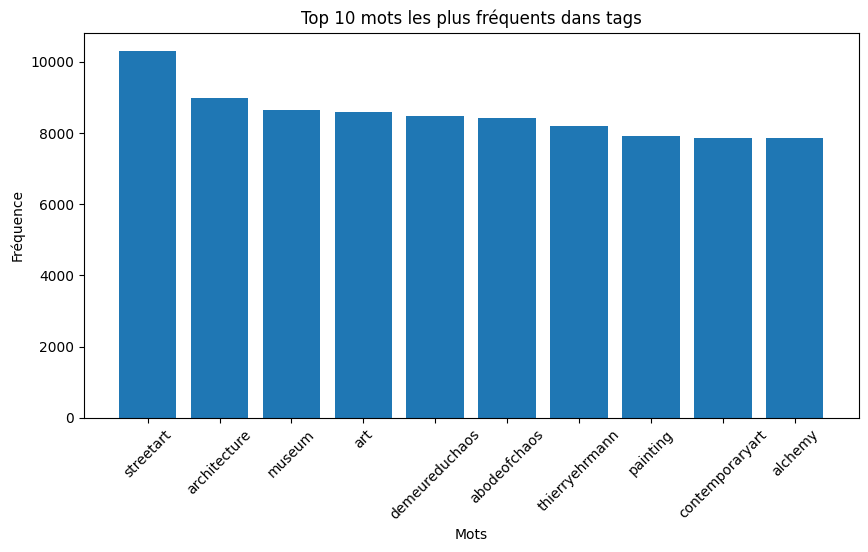

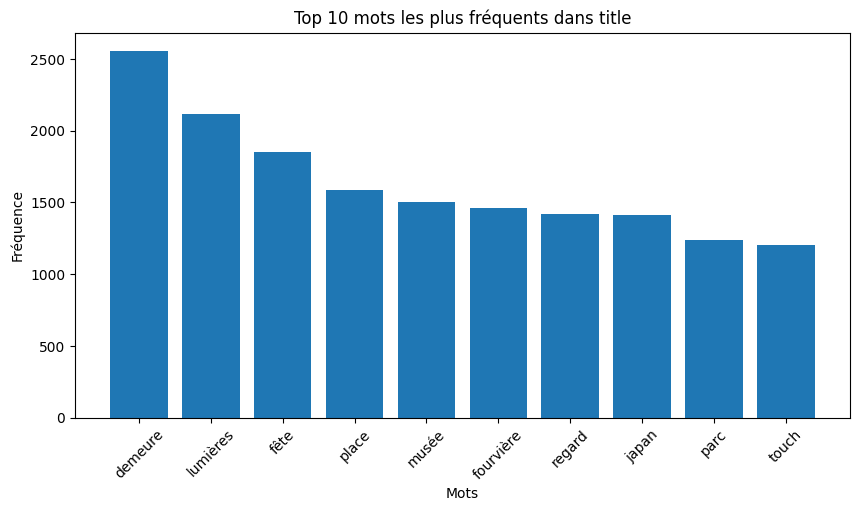

In [33]:
plot_word_frequencies(tags_counter, 'tags')
plot_word_frequencies(title_counter, 'title')

In [34]:
# Nettoyage supplémentaire pour retirer les apostrophes et autres symboles
def tokenize_column(column):
    text = column.str.cat(sep=', ').replace(',', ' ')
    text = re.sub(r"['’\-/:]", "", text)  # Retirer les apostrophes et guillemets
    words = text.split()
    return [word.lower() for word in words if word.lower() not in stopwords]

# Liste des mots à exclure (stopwords et termes spécifiques)
stopwords = set(['de', 'chaos', '[lyon', 'france]', ',', 'biennale', 'paper', 'abode', 'pasted', '2011', 'of', 'the', 'by', 'france', 'la', 'du', 'et', 'des', 'le', 'les', 'à', 'en', 'un', 'une', 'pour', 'avec', 'dans', 'sur', 'par', 'au', 'aux', 'ce', 'cet', 'cette', 'son', 'sa', 'se', 'ou', 'lyon', 'france'])

# Nettoyage supplémentaire pour retirer les apostrophes, les nombres et les mots d'une seule lettre
def tokenize_column(column):
    text = column.str.cat(sep=', ').replace(',', ' ')
    text = re.sub(r"['’\-+/:]", "", text)  # Retirer les apostrophes et guillemets
    words = text.split()
    return [word.lower() for word in words if word.lower() not in stopwords and len(word) > 1 and not any(char.isdigit() for char in word)]

# Identifier les mots les plus fréquents dans chaque cluster
def get_top_words_by_cluster(df, cluster_col, text_col, top_n=10):
    clusters = df[cluster_col].unique()
    cluster_top_words = {}

    for cluster in clusters:
        cluster_data = df[df[cluster_col] == cluster][text_col]
        words = tokenize_column(cluster_data)
        word_counter = Counter(words)
        cluster_top_words[cluster] = word_counter.most_common(top_n)

    return cluster_top_words

# Calculer la moyenne de fréquence des mots les plus communs sur tous les clusters
def get_average_top_words(cluster_top_words):
    word_frequencies = Counter()
    cluster_count = len(cluster_top_words)

    for words in cluster_top_words.values():
        for word, freq in words:
            word_frequencies[word] += freq

    # Moyenne des fréquences
    average_frequencies = {word: freq / cluster_count for word, freq in word_frequencies.items()}
    return average_frequencies

# Fonction pour afficher les mots les plus fréquents par cluster
def plot_word_frequencies(counter, cluster_name):
    most_common = counter.most_common(10)
    if most_common:
        words, counts = zip(*most_common)
        plt.figure(figsize=(10, 5))
        plt.bar(words, counts)
        plt.title(f"Top 10 mots les plus fréquents dans le cluster {cluster_name}")
        plt.xlabel("Mots")
        plt.ylabel("Fréquence")
        plt.xticks(rotation=45)
        plt.show()

def plot_average_word_frequencies(average_top_words):
    sorted_avg = sorted(average_top_words.items(), key=lambda x: x[1], reverse=True)
    words, counts = zip(*sorted_avg[:10])
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.title("Moyenne des fréquences des mots les plus communs sur tous les clusters")
    plt.xlabel("Mots")
    plt.ylabel("Fréquence moyenne")
    plt.xticks(rotation=45)
    plt.show()



Top mots par cluster:
Cluster -1: [('ehrmann', 2608), ('demeure', 2556), ('thierry', 2515), ('lumières', 2096), ('fête', 1847), ('place', 1567), ('fourvière', 1445), ('musée', 1436), ('regard', 1417), ('#lyon', 1152)]


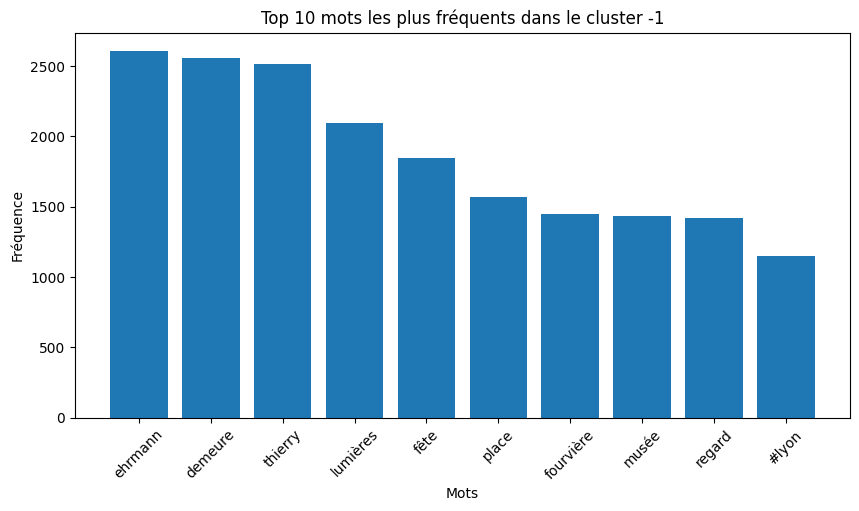

Cluster 1: [('japan', 1024), ('touch', 1024), ('cosplay', 401), ('concours', 341), ('eurexpo', 278), ('cosplayer', 246), ('international', 119), ('bus', 102), ('daimler', 91), ('buses', 91)]


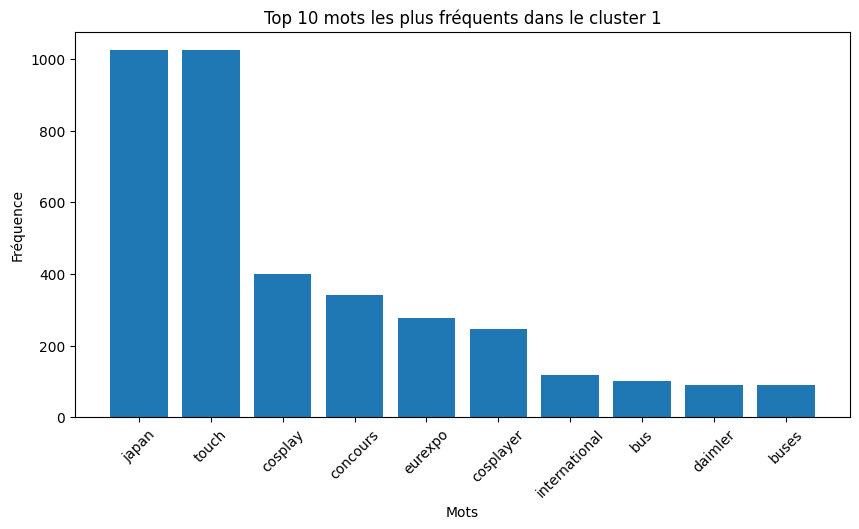

Cluster 2: [('grand', 43), ('cormoran', 39), ('(phalacrocorax', 36), ('carbo)', 36), ('cendré', 33), ('huppé', 32), ('héron', 31), ('grèbe', 30), ('(ardea', 28), ('cinerea)', 28)]


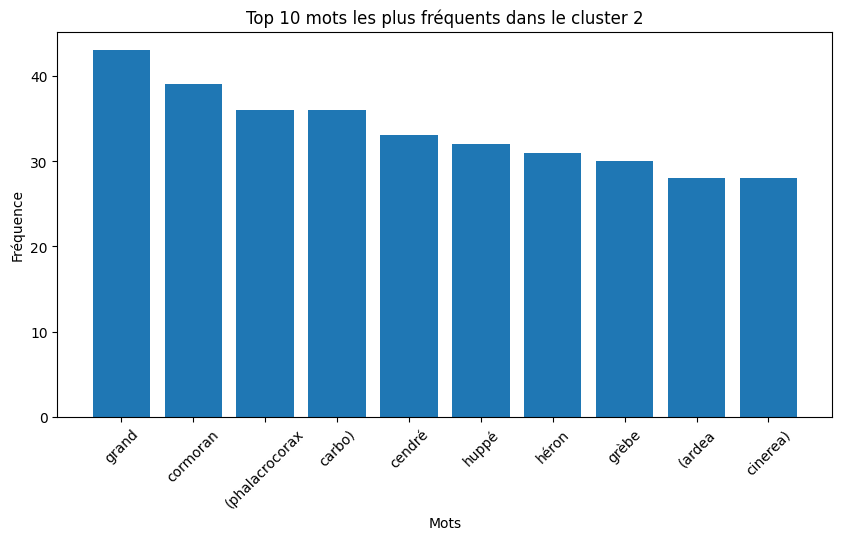

Cluster 3: [('moderne', 27), ('radio', 19), ('elvis', 19), ('@lepicerie', 19), ('low', 10), ('sleaford', 8), ('mods', 8), ('jl', 8), ('prades', 8), ('reversed', 8)]


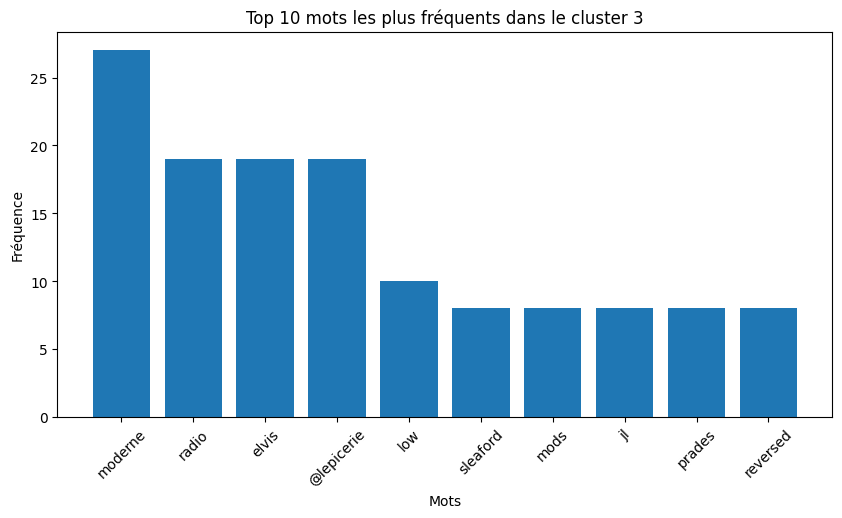

Cluster 4: [('mont', 5), ('montblanc', 5), ('cindre', 2), ('thou', 2), ('nord', 1), ('lumières', 1), ('lagglo', 1), ('lyonnaise', 1), ('#moi', 1), ('#matin', 1)]


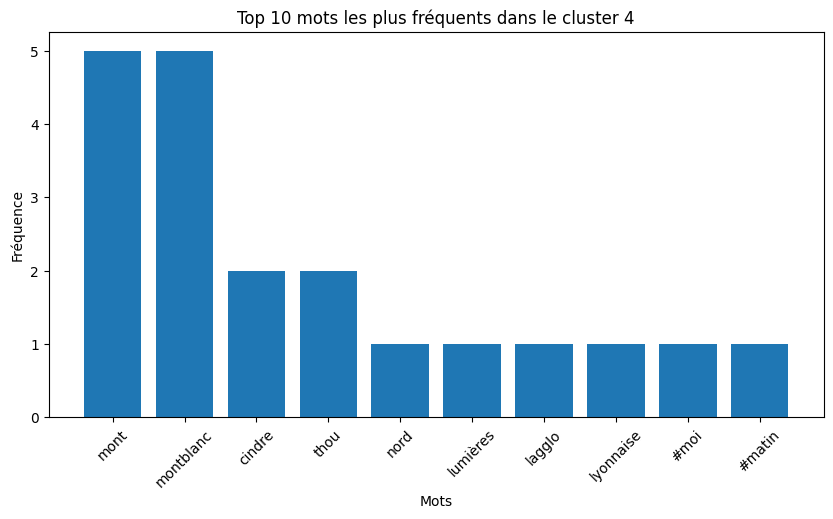

Cluster 5: [('sauvagie', 38), ('mésange', 17), ('abeille', 14), ('geai', 13), ('chat', 12), ('flowers', 11), ('longue', 11), ('aurore', 11), ('queue', 10), ('colvert', 9)]


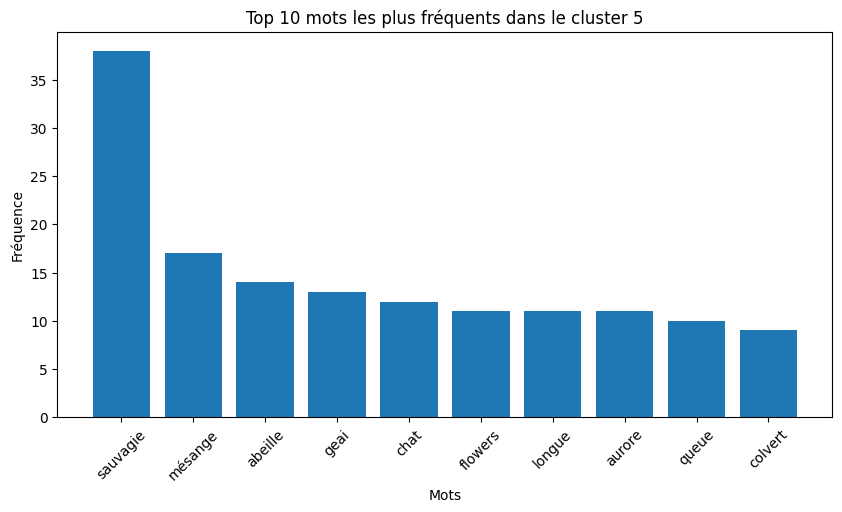

Cluster 6: [('#instafood', 14), ('#asianfood', 12), ('pas', 8), ('démolition', 8), ('tours', 8), ('lyautey', 8), ('velette', 8), ('rillieuxlapape', 8), ('paul', 8), ('je', 7)]


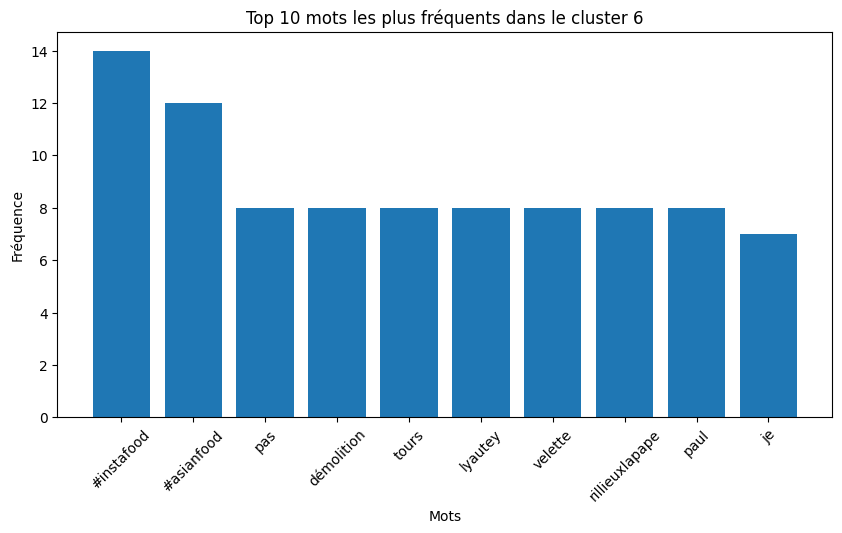

Cluster 7: [('lecole', 56), ('artistes...', 56), ('wangan', 35), ('import', 35), ('mazda', 17), ('nissan', 16), ('toyota', 14), ('honda', 11), ('allons', 10), ('moso', 10)]


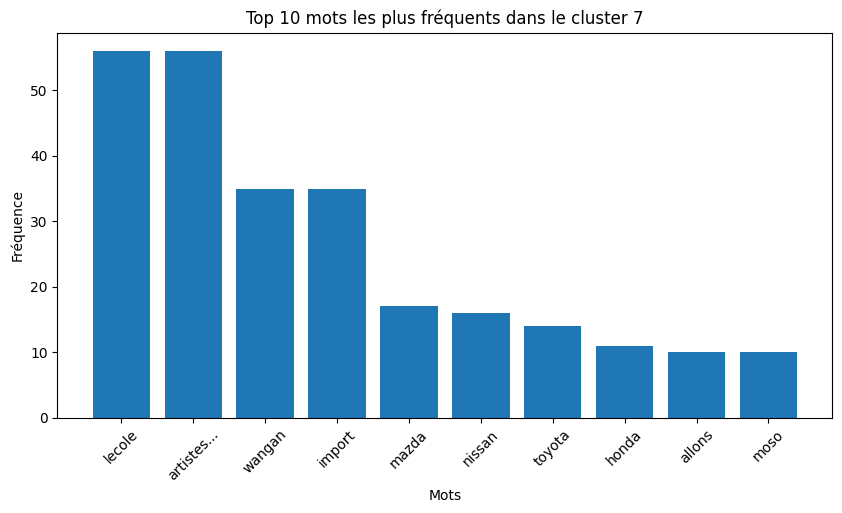

Cluster 8: [('ol', 47), ('parc', 46), ('coldplay', 45), ('version', 45), ('portugal', 41), ('vs.', 41), ('hungary', 41), ('stadium', 35), ('groupama', 33), ('céline', 32)]


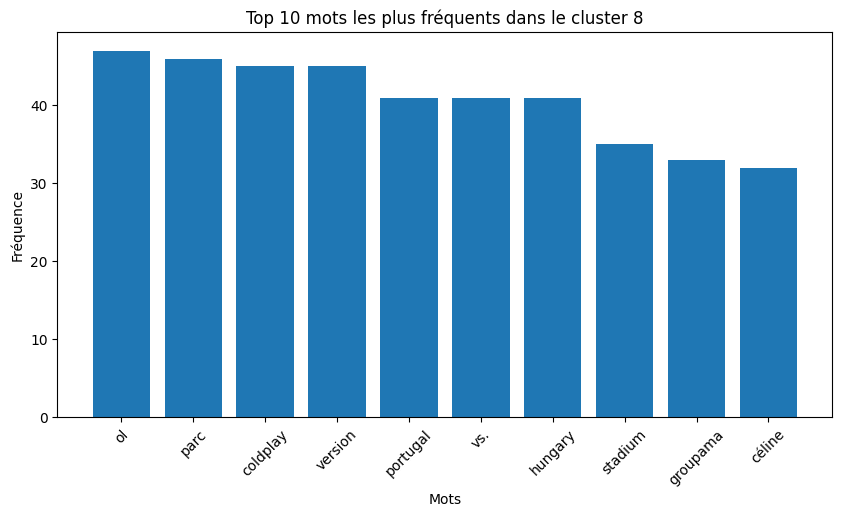

Cluster 9: [('bruissin', 1), ('have', 1), ('dream...', 1)]


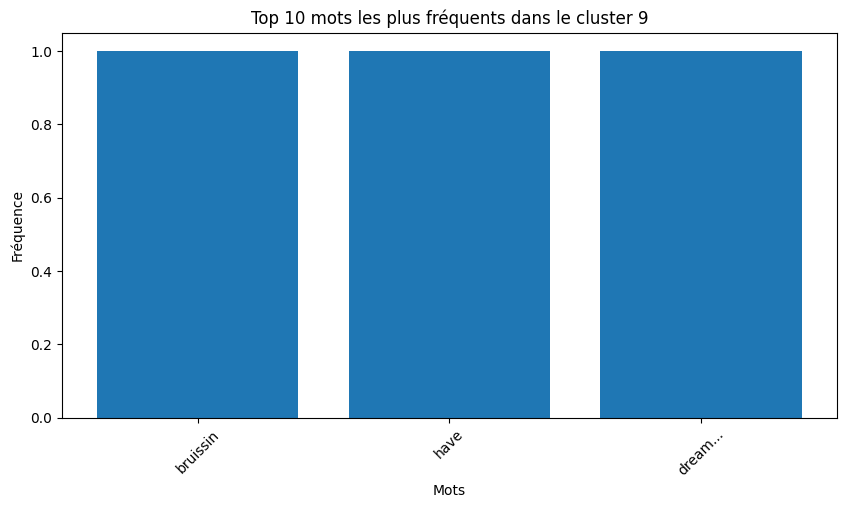

Cluster 10: [('mésanges', 11), ('oisillons', 6), ('mésange', 6)]


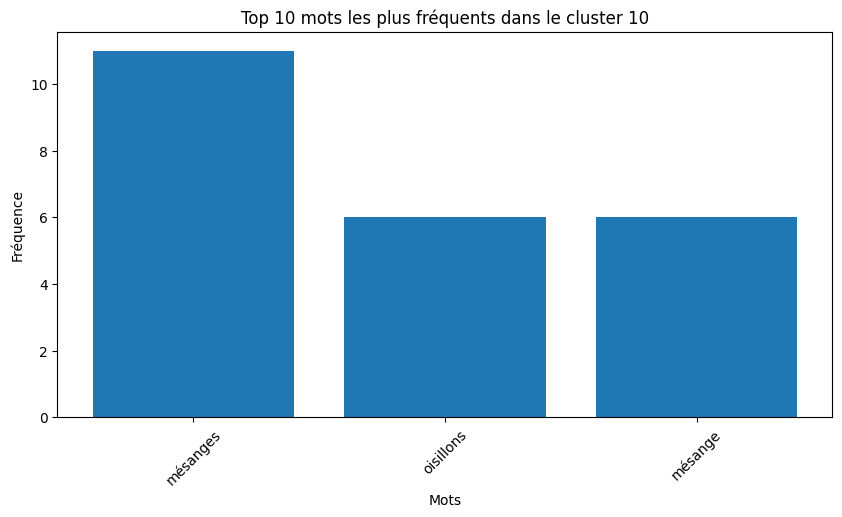

Cluster 11: [('orages', 10), ('vaulx', 10), ('velin', 10), ('photo', 5), ('cours', 3), ('plongée', 3), ('lentpe', 3), ('chemin', 2), ('grand', 2), ('bois', 2)]


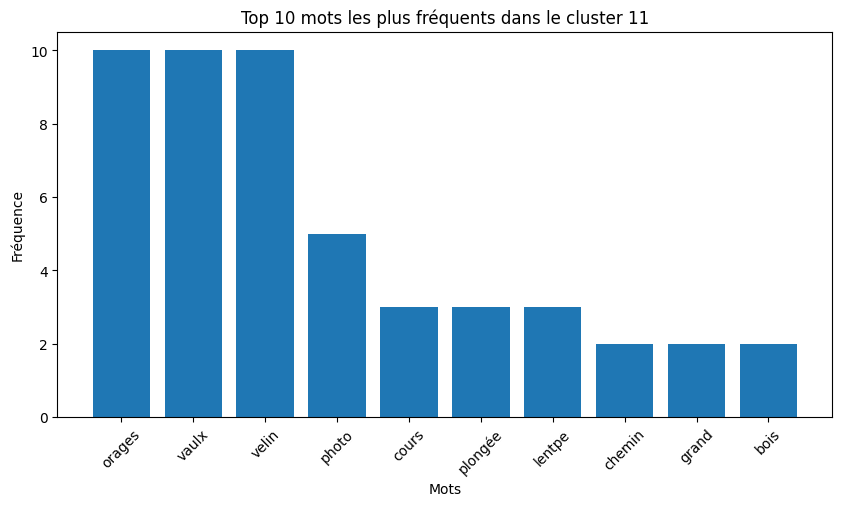

Cluster 12: [('mercedes', 4), ('sportive', 2), ('chapelle', 2), ('trinité', 2), ('bentley', 2), ('putain...', 1), ('(((', 1), ('sport', 1), ('hdr', 1), ('wiliams', 1)]


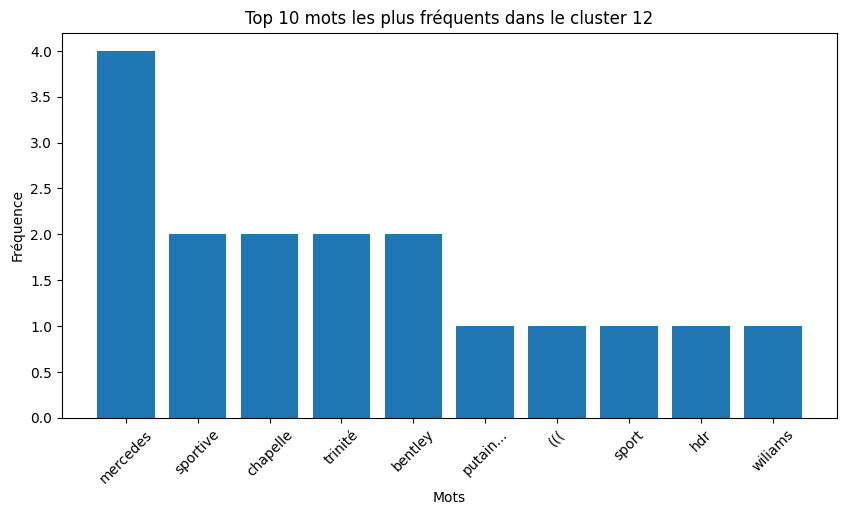

Cluster 13: [('palette', 2), ('nightmare', 2)]


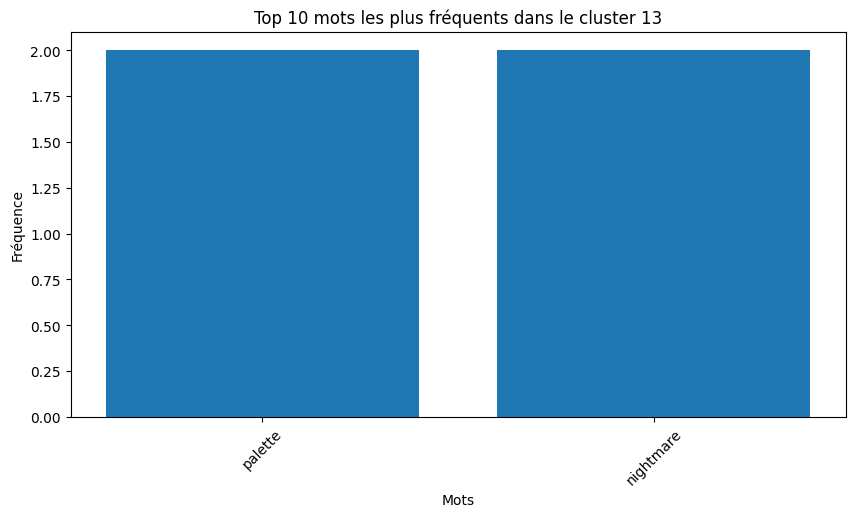

Cluster 14: [('chaponost', 28), ('romain', 17), ('gier', 14), ('aqueduc', 13), ('aqueducs', 11), ('roman', 6), ('(rhône)', 6), ('aqueduct', 5), ('in', 5), ('and', 1)]


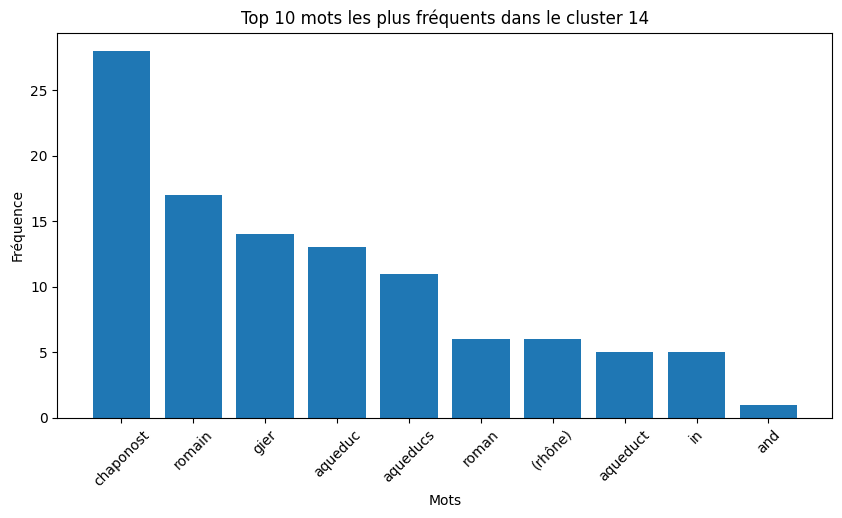

Cluster 15: [('rallye', 10), ('gones', 10), ('prototype', 9), ('citroën', 9), ('tpv', 9), ('peugeot', 7), ('darlmat', 7), ('viper', 2), ('venom', 2), ('tons', 2)]


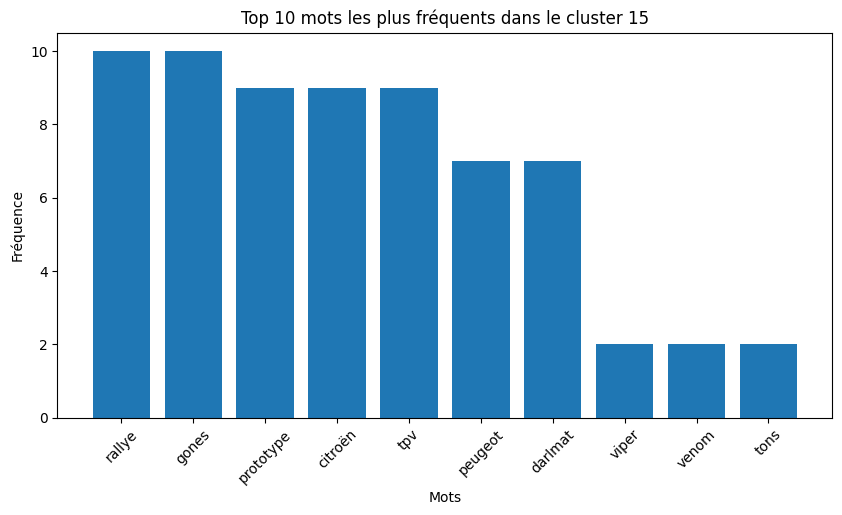

Cluster 16: [('carré', 1), ('croix', 1), ('saint', 1), ('andré', 1)]


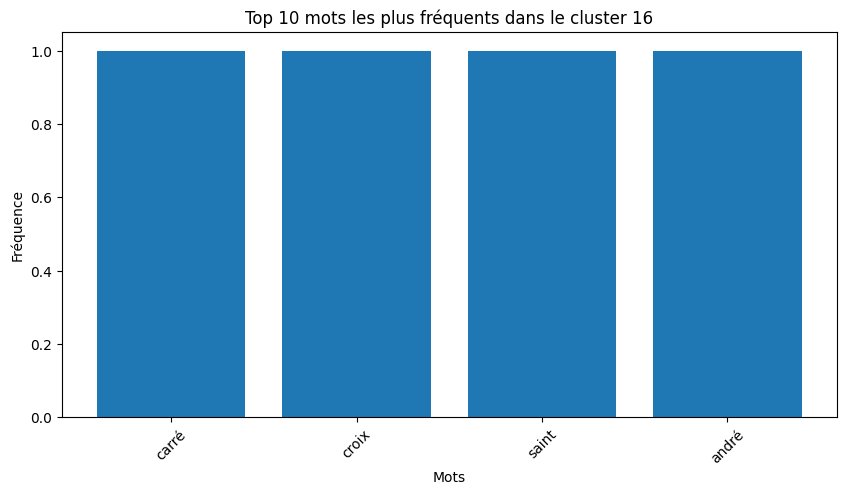

Cluster 17: [('ferrari', 1), ('italia', 1), ('cheers', 1), ('flower', 1), ('scarce', 1), ('swallowtail', 1), ('flambé', 1), ('iphiclides', 1), ('podalirius', 1)]


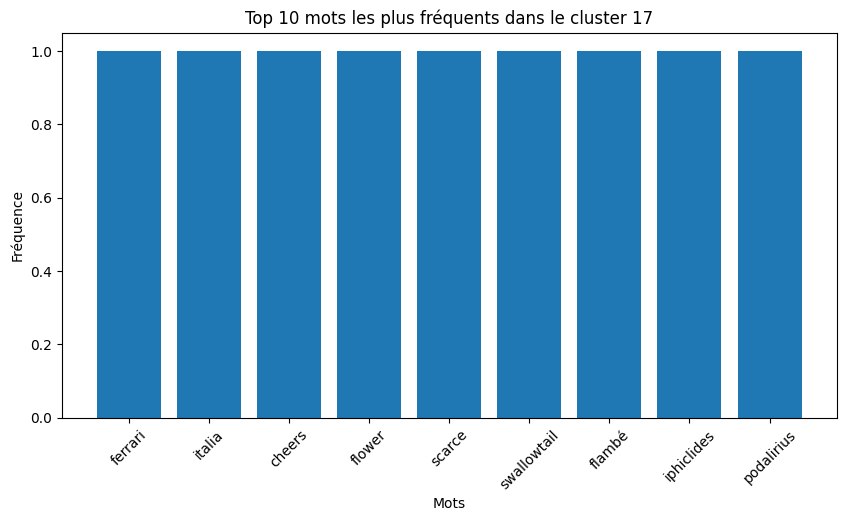

Cluster 18: []
Cluster 19: [('feet', 2), ('warming', 1), ('my', 1), ('in', 1), ('sun', 1), ('bourdon', 1), ('tournesol', 1), ('free', 1)]


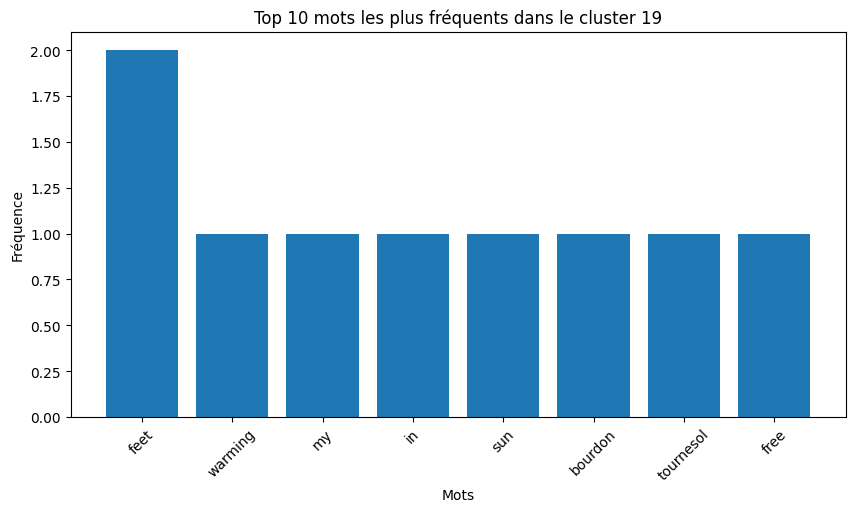

Cluster 20: [('sncf', 18), ('wagons', 10), ('fret', 9), ('plats', 7), ('...', 6), ('ecluse', 5), ('pierrebénite', 5), ('rhône', 5), ('fons', 4), ('ter', 4)]


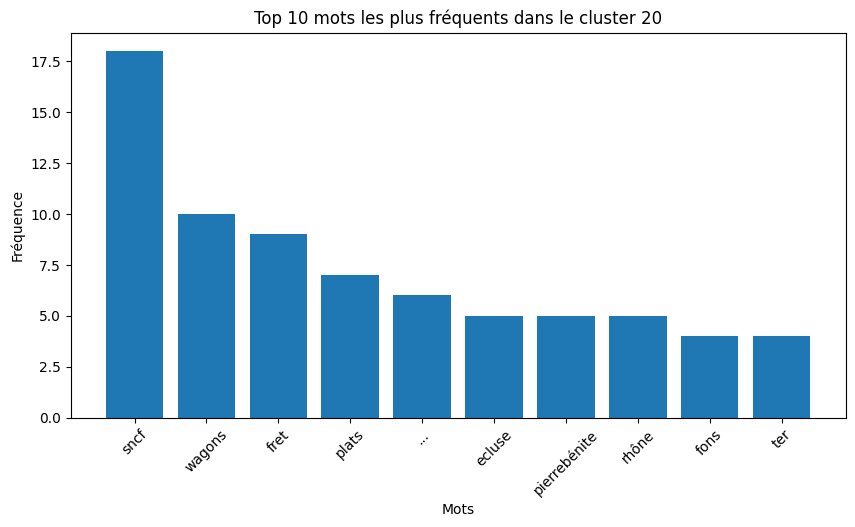

Cluster 55: [('planning', 1), ('sept.', 1), ('oct.', 1), ('chatelard_hdr', 1), ('champs_hdr', 1), ('insecte', 1)]


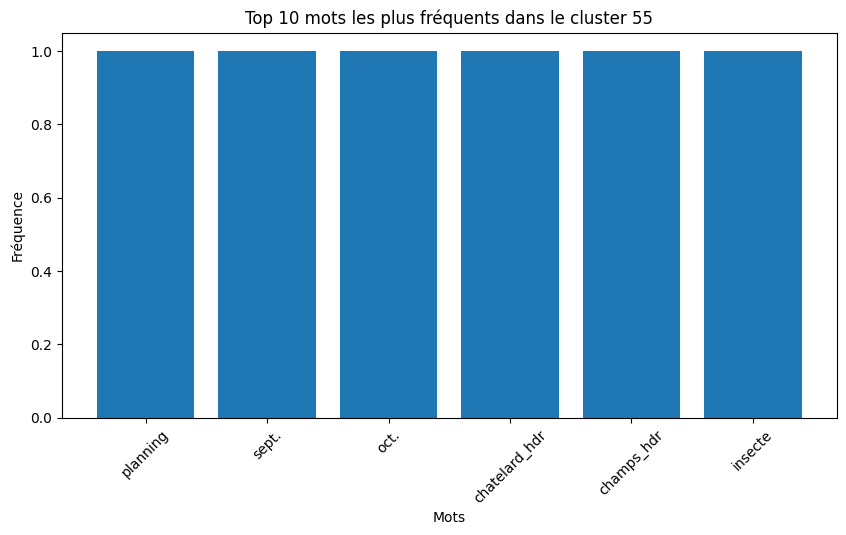

Cluster 21: [('lacroixlaval', 29), ('parc', 22), ('juillet', 19), ('château', 10), ('charbonnièreslesbains', 7), ('pélagie', 6), ('wintercross', 5), ('(rhône', 3), ('france)', 3), ('affiche.jpg', 3)]


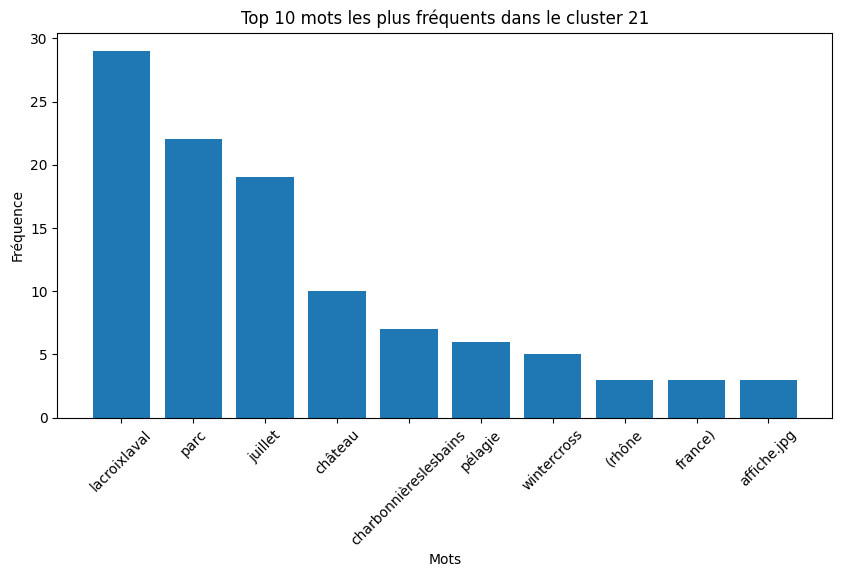

Cluster 22: [('saintdidieraumontdor', 7), ('running', 1), ('bit', 1), ('late', 1), ('model', 1), ('marie', 1)]


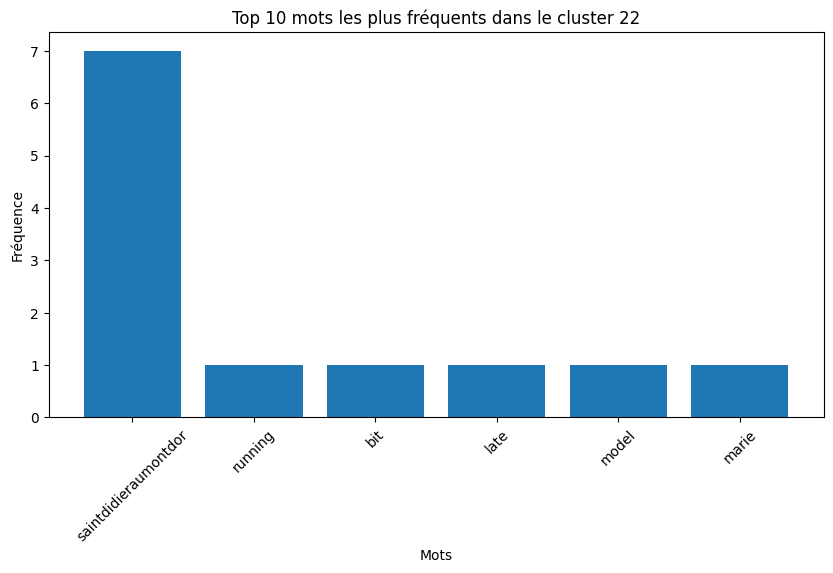

Cluster 23: [('lione', 15), ('ponte', 2), ('and', 2), ('piazza', 1), ('principale', 1), ('sul', 1), ('fiume', 1), ('sulla', 1), ('saona', 1), ('fleur', 1)]


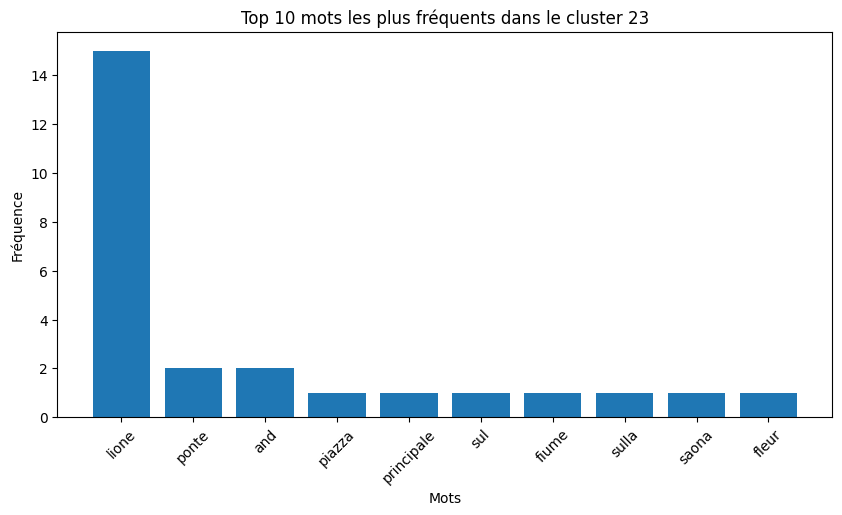

Cluster 24: [('feyzin', 4), ('raffinerie', 3), ('die', 1), ('raffinerien', 1), ('meiner', 1), ('kindheit', 1), ('(france)', 1), ('indus', 1)]


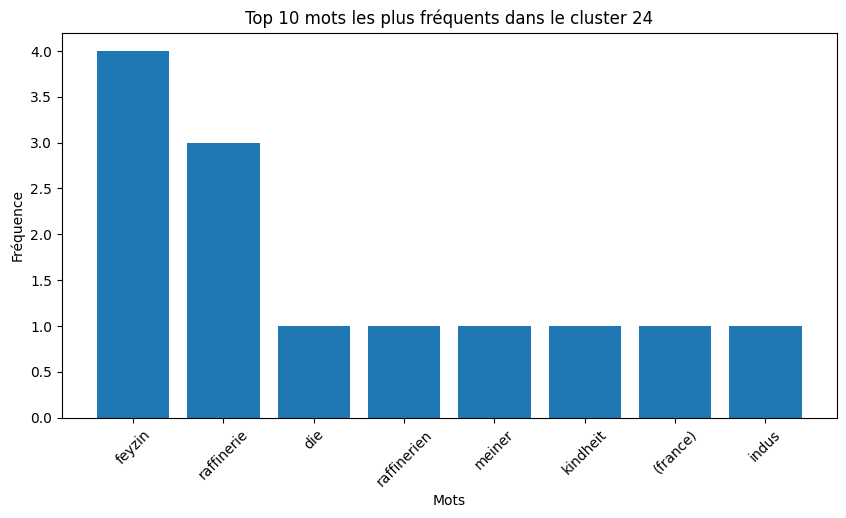

Cluster 25: [('coquelicots', 1), ('bienvenue', 1), ('stétienne', 1), ('promenade', 1), ('champs', 1)]


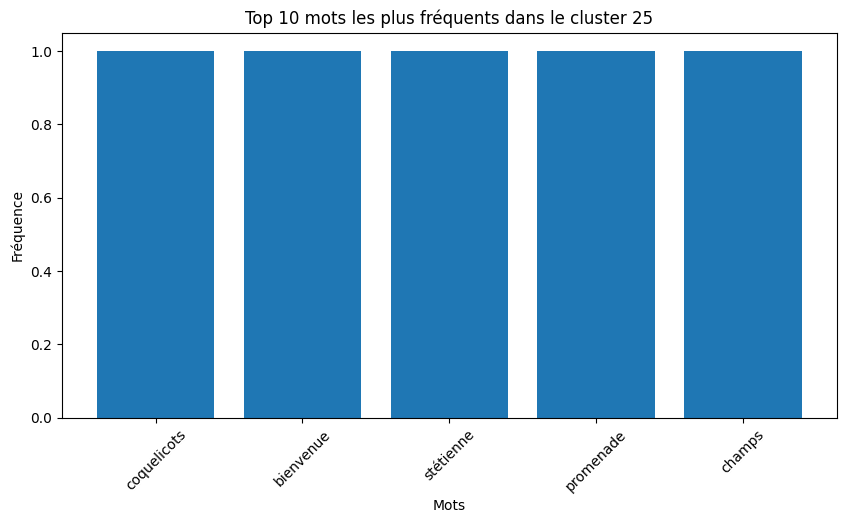

Cluster 26: [('saint', 2), ('genis', 2), ('ollières', 2), ('vtt', 2), ('monts', 2), ('lyonnais', 2), ('vélo', 1), ('enneigé', 1), ('notre', 1), ('poilu', 1)]


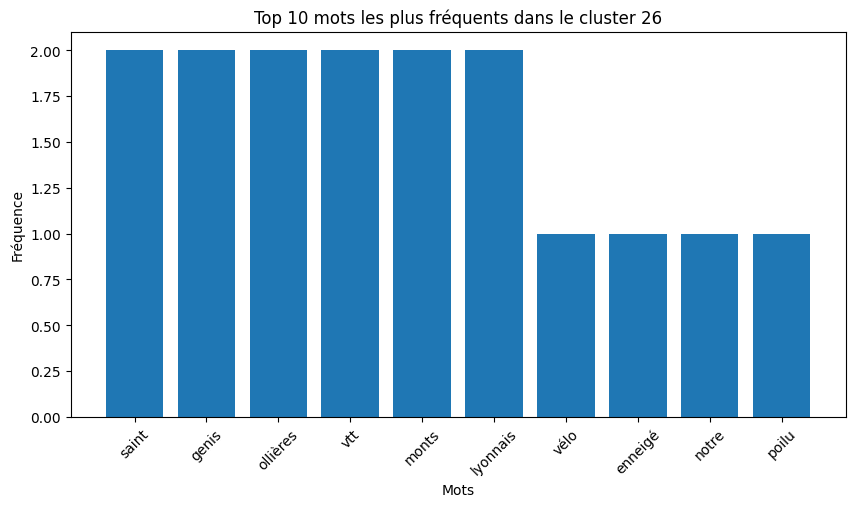

Cluster 27: [('flux', 4), ('chaponost', 4), ('promenades', 2), ('automnales', 2), ('(france)', 2), ('parc', 2), ('boulard', 2), ('aqueduc', 1), ('ii', 1), ('couleurs', 1)]


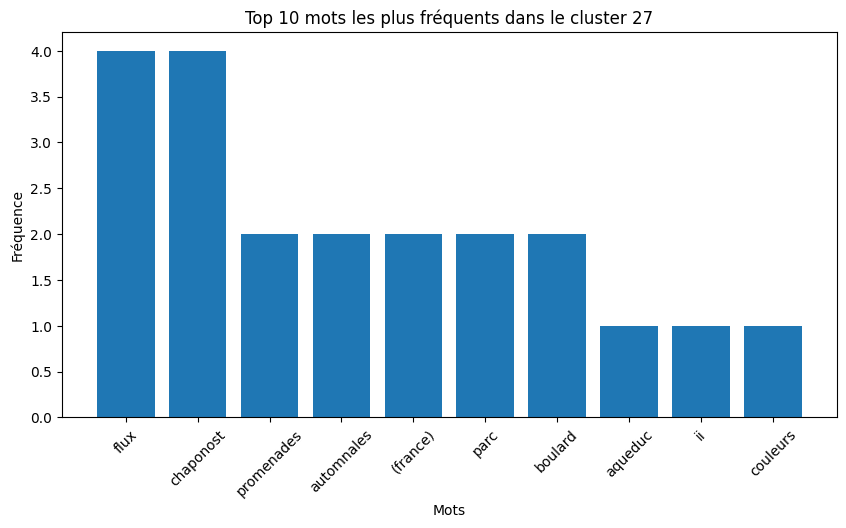

Cluster 28: [('#apero', 3), ('#sunset', 2), ('#beer', 2), ('quon', 2), ('ici', 2), ('cest', 2), ('#overwater', 2), ('#instafriend', 1), ('vivement', 1), ('baigne.', 1)]


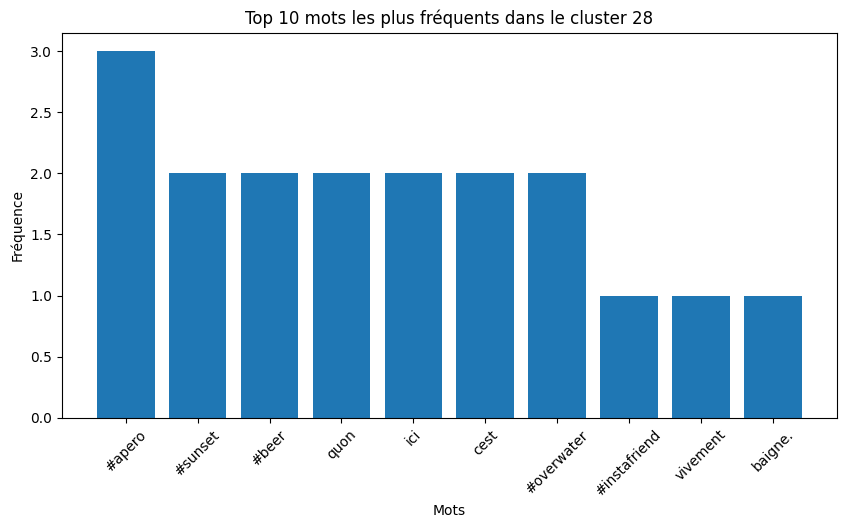

Cluster 42: [('tramtrain', 2), ('viaduc', 1), ('francheville', 1), ('#wintercross', 1), ('prend', 1), ('hauteur', 1), ('juillet', 1)]


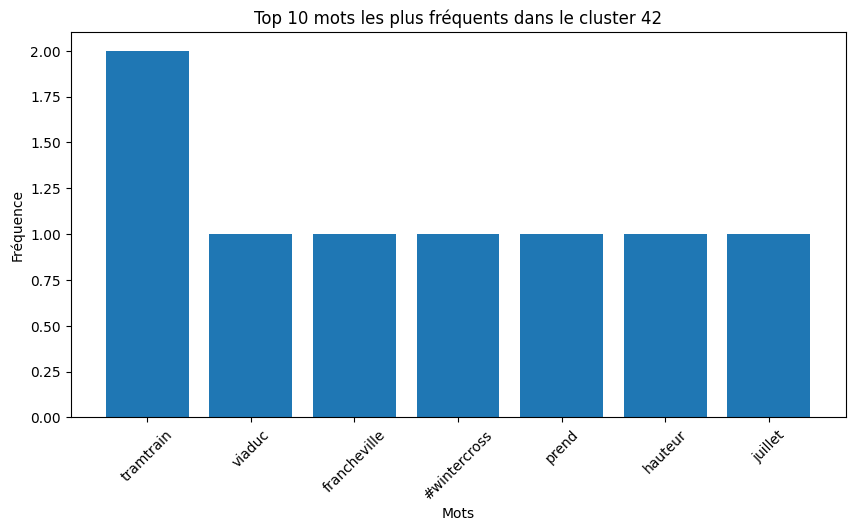

Cluster 29: [('my', 1), ('place', 1)]


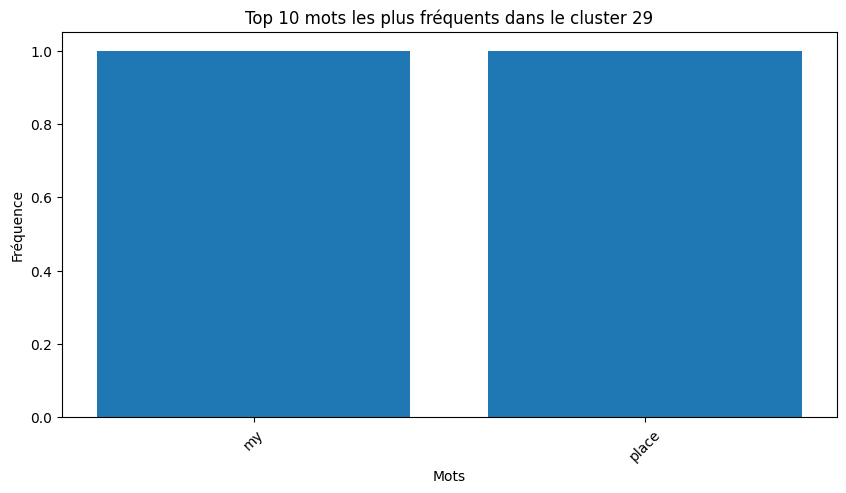

Cluster 30: [('pierre', 2), ('bénite', 2), ('gare', 1), ('vers', 1), ('linfini', 1), ('delà...', 1), ('wanted', 1), ('danger', 1), ('mort', 1), ('could', 1)]


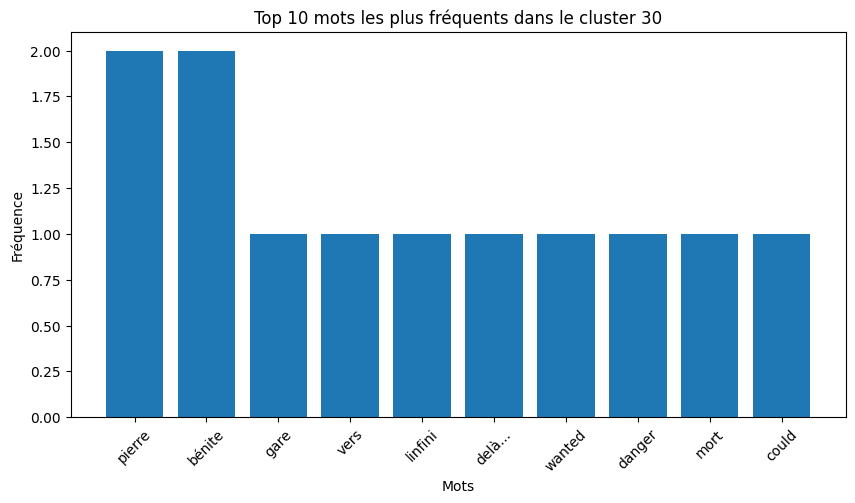

Cluster 31: [('saintgenislaval', 27), ('parc', 27), ('beauregard', 27), ('small', 3), ('hotel', 3), ('room', 3), ('automoi', 3), ('léandre', 2), ('lorangerie', 2), ('ruines', 2)]


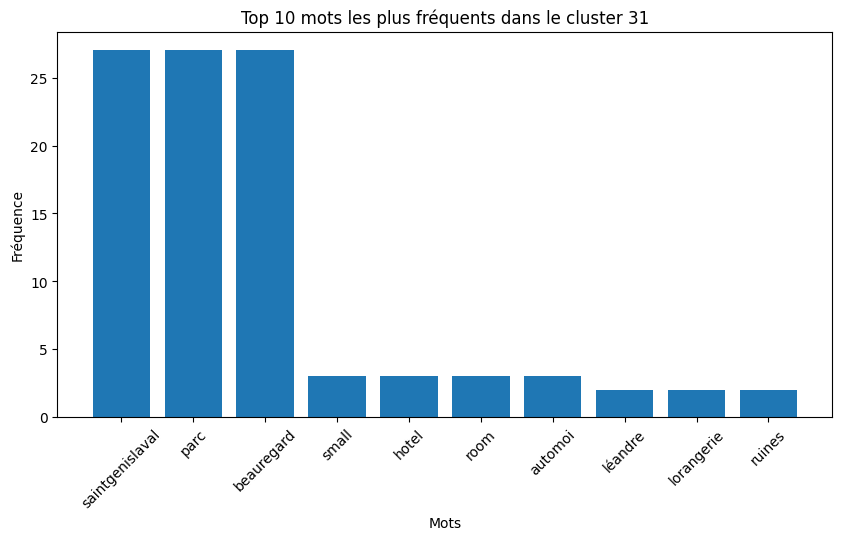

Cluster 32: [('(re)naissance', 1), ('animalité', 1), ('quest', 1), ('que', 1), ('je', 1), ('vous', 1), ('sert?', 1), ('vieux', 1), ('dossier...', 1), ('matter', 1)]


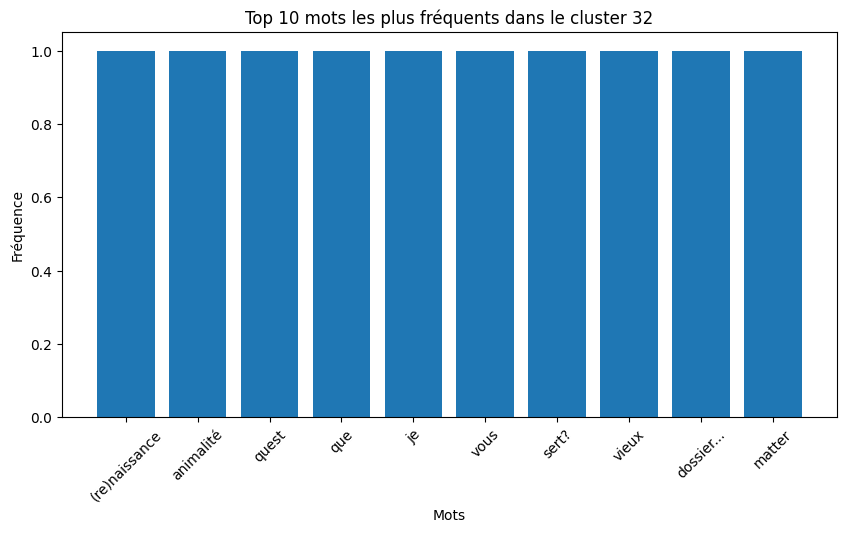

Cluster 33: [('corbas', 1), ('boulevard', 1), ('urbain', 1), ('sud', 1)]


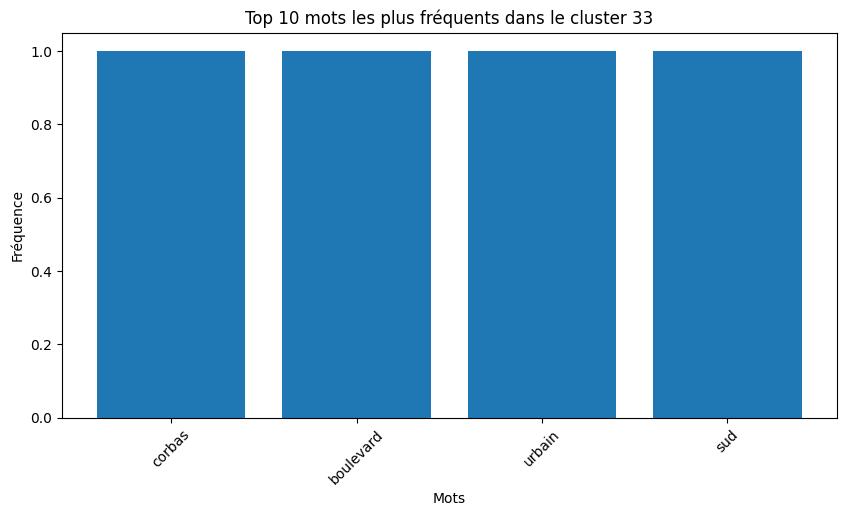

Cluster 34: [('décines', 2), ('grand', 2), ('large', 2), ('lanneau', 2), ('bleu', 2), ('forêt', 1), ('piochet', 1), ('pont', 1), ('dherbens', 1)]


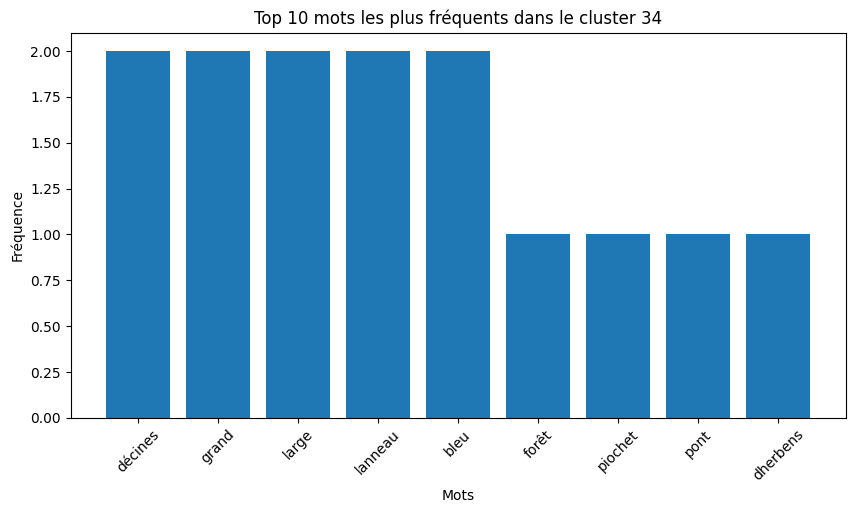

Cluster 35: [('vtt', 2), ('jardin', 2), ('(chez', 2), ('ouam)', 2), ('méridien', 2), ('ouest', 1), ('lyonnais', 1), ('déambulation', 1), ('chemins', 1), ('mercure', 1)]


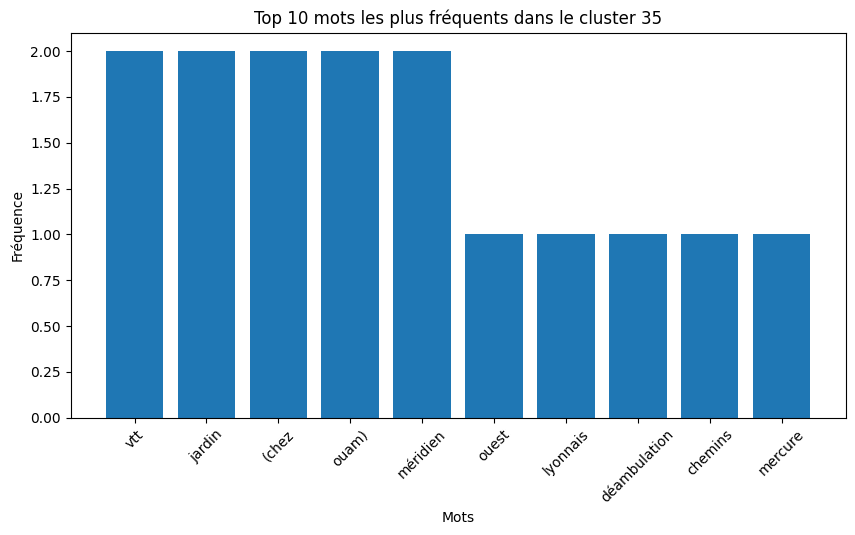

Cluster 36: [('noël', 6), ('colza', 3), ('soleil', 3), ('perles', 3), ('deau', 3), ('brouillard', 2), ('coucher', 2), ('toile', 2), ('baies', 1), ('nature', 1)]


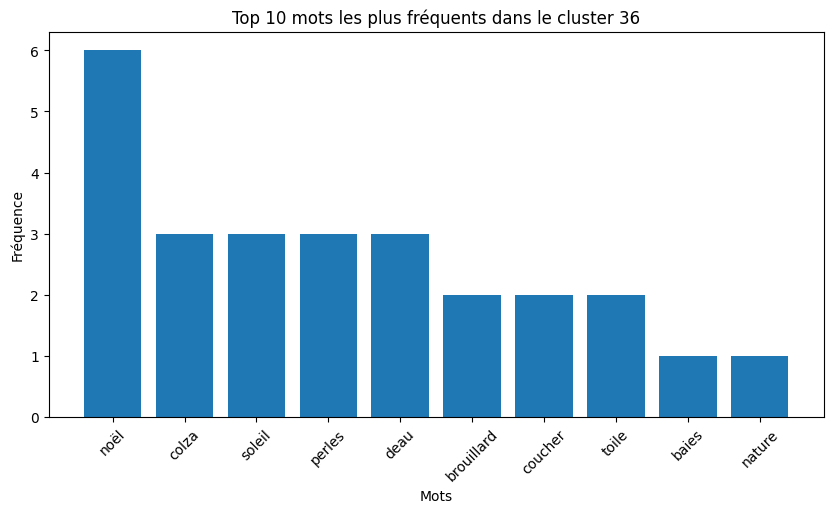

Cluster 37: [('industrie', 3), ('blanc', 2), ('concept', 1), ('car', 1), ('citroen', 1), ('sharpei', 1)]


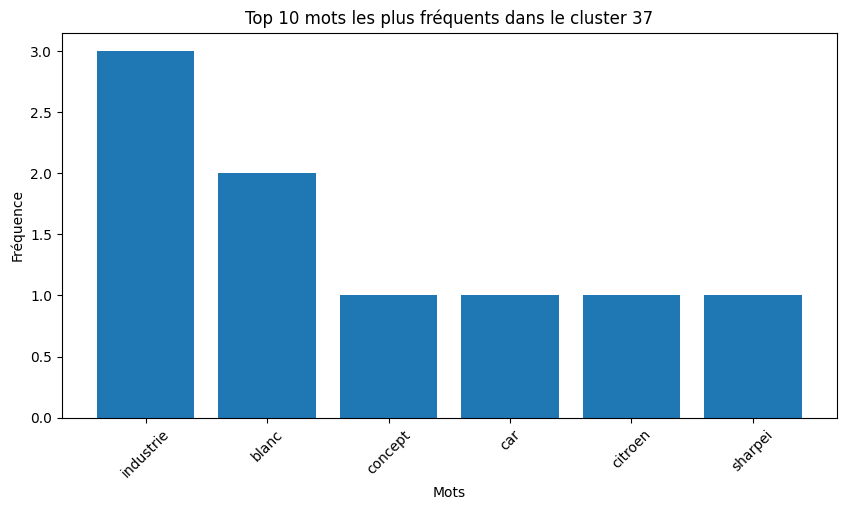

Cluster 38: []
Cluster 39: [('bestiole', 1), ('uno', 1), ('pâquerette', 1), ('dixcy', 1)]


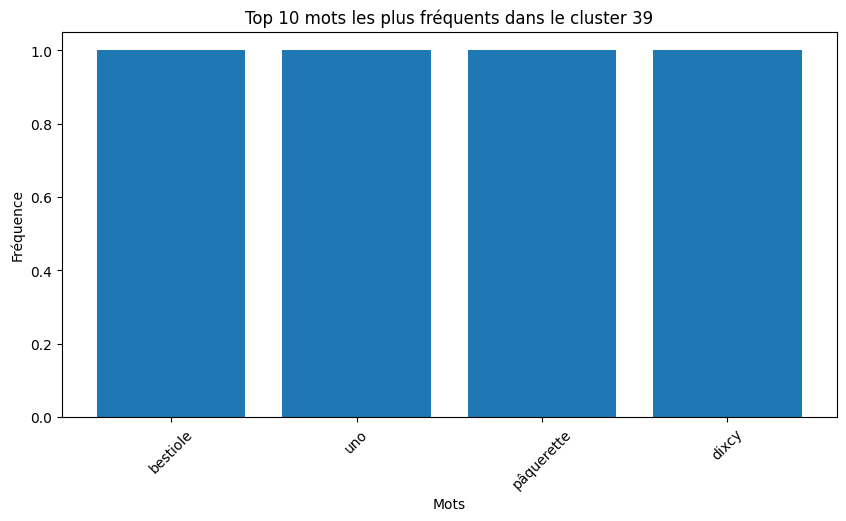

Cluster 40: [('thailand', 5), ('kuala', 1), ('lumpur', 1), ('poppysplash', 1)]


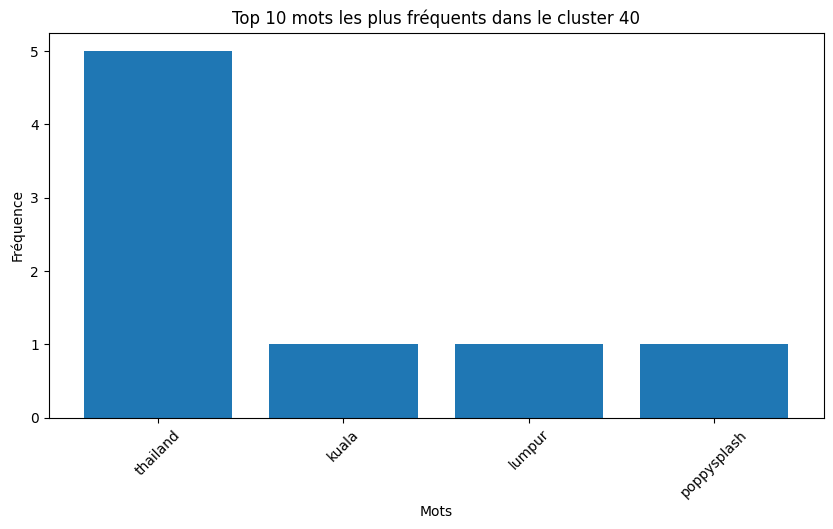

Cluster 41: [('tramtrain', 1), ('jardins', 1), ('samedi', 1), ('aprèsmidi', 1), ('terre', 1), ('чтобы', 1), ('проехать', 1), ('электричке', 1), ('билет', 1), ('необходимо', 1)]


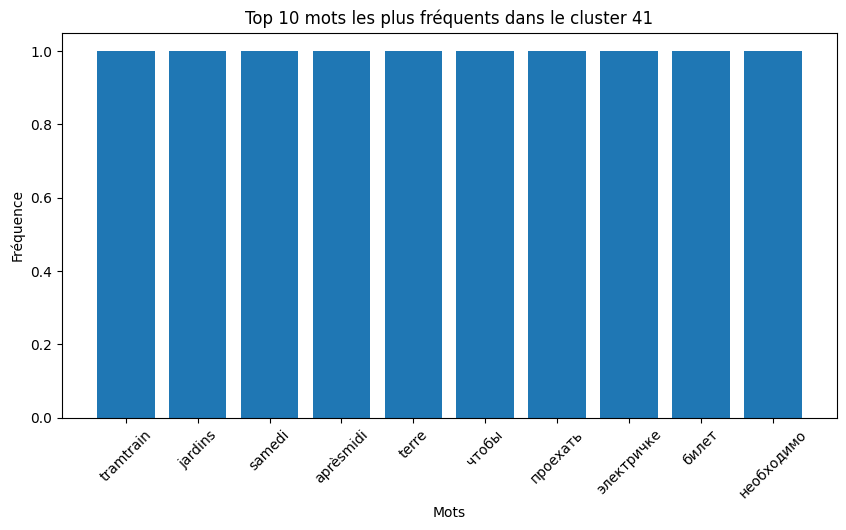

Cluster 43: [('miribel', 2), ('jonage', 2), ('from', 2), ('sky', 2), ('white', 2), ('tree', 2), ('last', 2), ('day', 2), ('wide', 1), ('angle', 1)]


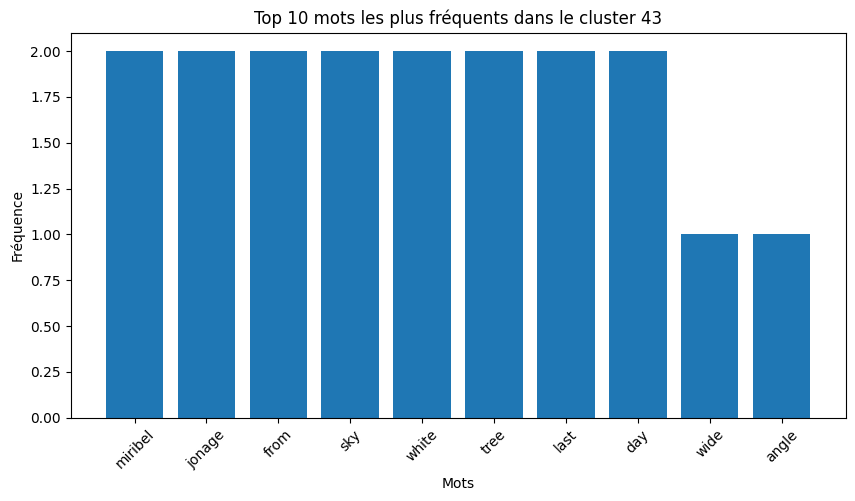

Cluster 44: [('saintfortunat', 3), ('wintercross', 2), ('mont', 2), ('montagnards', 1), ('rando', 1), ('curis', 1), ('dor', 1), ('thou', 1), ('cabornes', 1), ('jérémy', 1)]


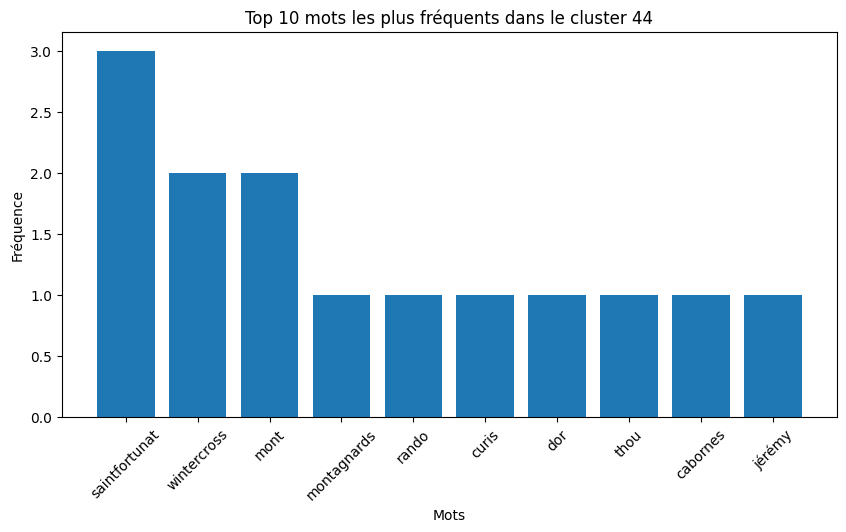

Cluster 45: [('sncf', 14), ('wagons', 9), ('plats', 4), ('fret', 3), ('tombereaux', 3), ('train', 3), ('miribel', 2), ('trémies', 2), ('euro', 2), ('corail', 2)]


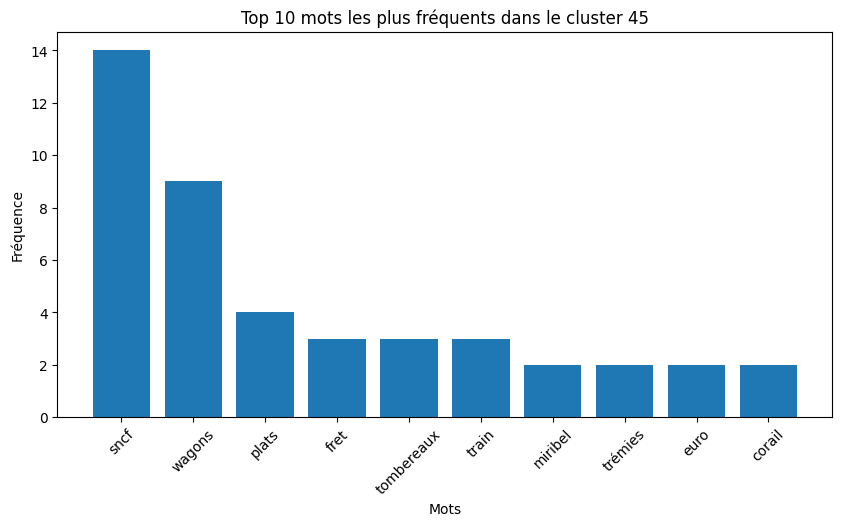

Cluster 46: [('flux', 3), ('lyzeron', 3), ('#moi', 1), ('#france', 1), ('#lyon', 1), ('#niceday', 1), ('#niece', 1), ('#selfie', 1), ('#tete', 1), ('#noiretblanc', 1)]


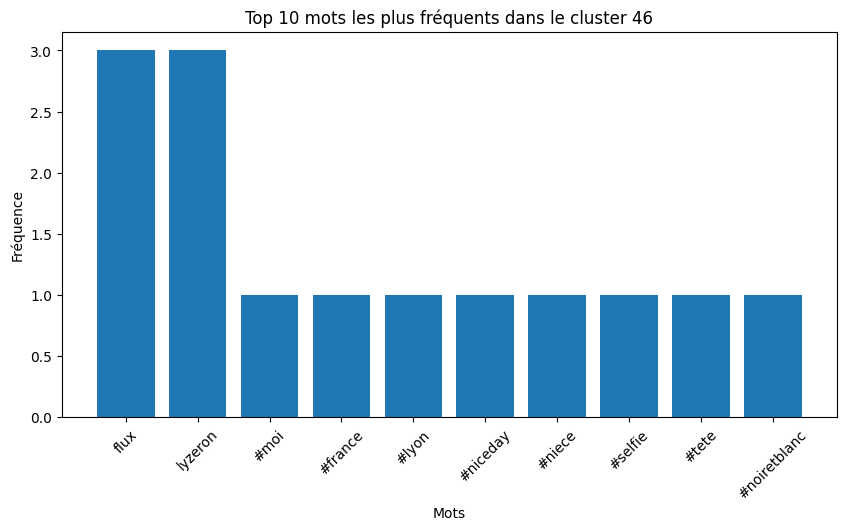

Cluster 47: [('eva', 8), ('alice', 3), ('ballons', 3), ('bouteilles', 1), ('peinture', 1), ('champs', 1), ('escalier', 1), ('conféties', 1)]


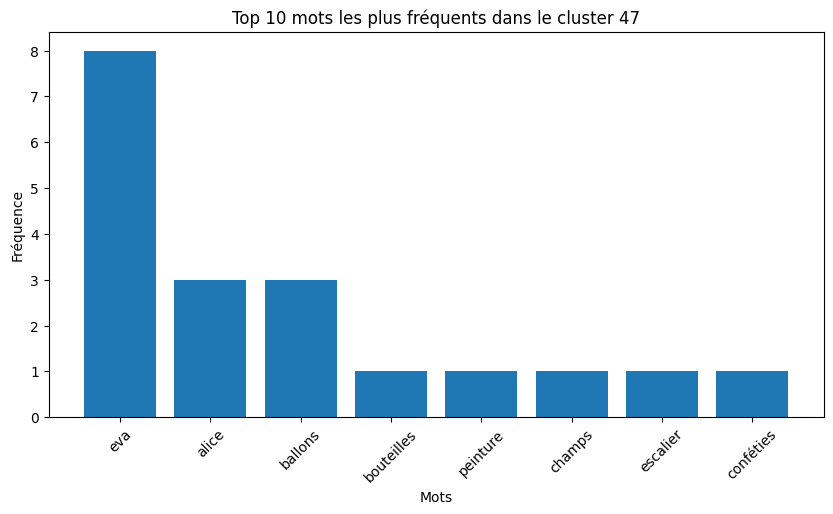

Cluster 48: [('#tw', 2), ('#corbas', 1), ('#lyonsuburb', 1), ('tentative', 1), ('décrire', 1), ('#france', 1), ('ciel', 1), ('lyonnais', 1), ('#fraall', 1)]


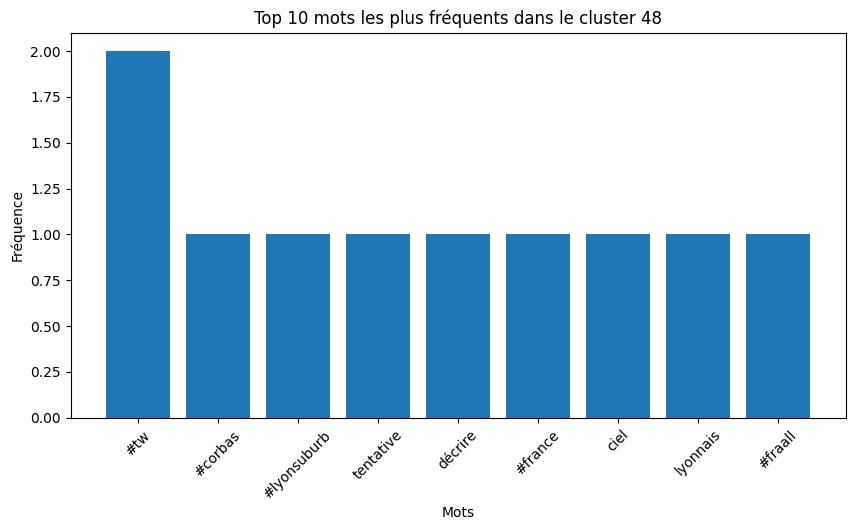

Cluster 49: [('vtt', 4), ('monts', 4), ('lyonnais', 4), ('chêne', 1), ('stade', 1)]


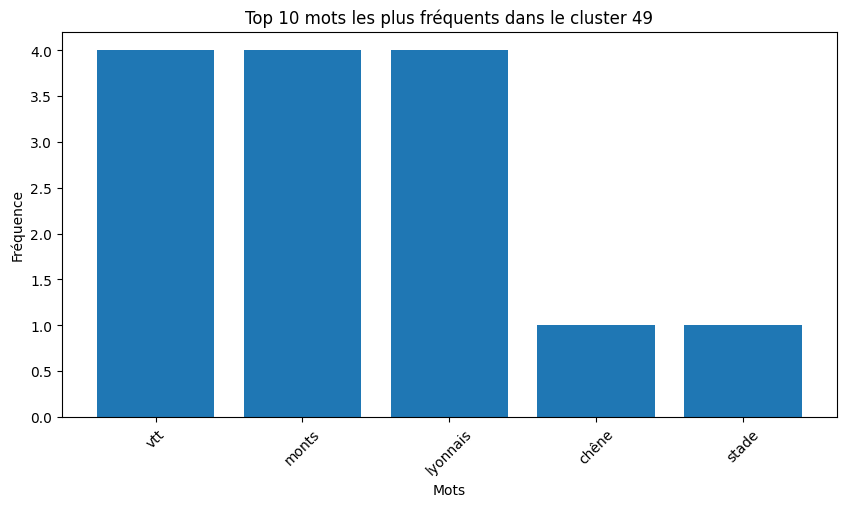

Cluster 50: [('trétaux', 1), ('irisbus', 1), ('agora', 1), ('line', 1)]


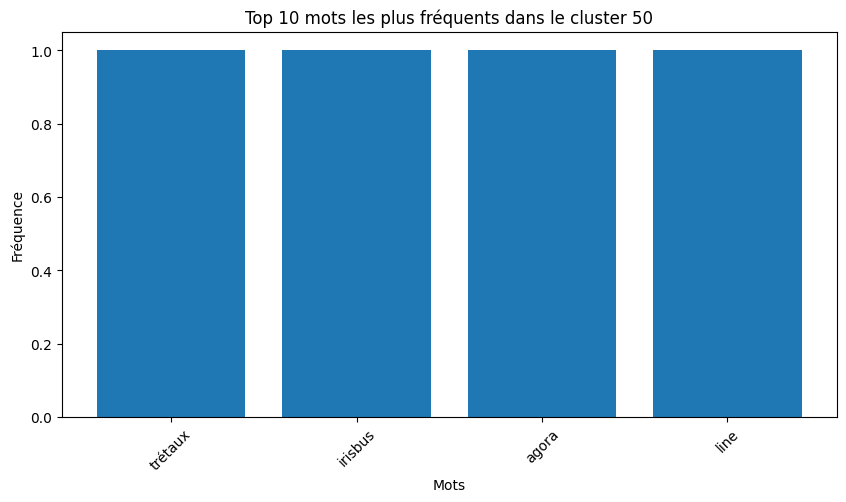

Cluster 51: [('vtt', 3), ('mdl', 3), ('berges', 3), ('lyzeron', 3), ('sentier', 3), ('galets', 3), ('voyageurs', 3), ('mon', 1), ('beau', 1), ('sapin', 1)]


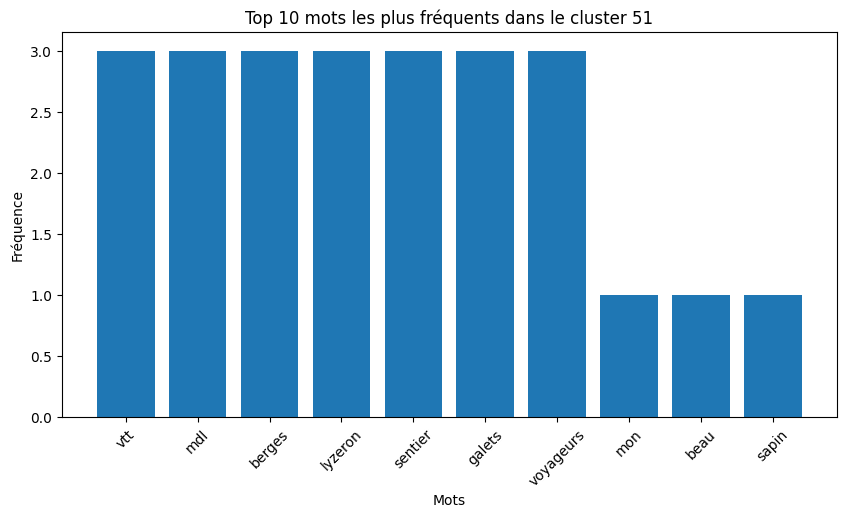

Cluster 52: [('corbas', 4), ('zi', 3), ('avion', 1), ('militaire', 1), ('dessus', 1), ('rue', 1), ('marcel', 1), ('merieux', 1), ('chemin', 1), ('grangeblanche', 1)]


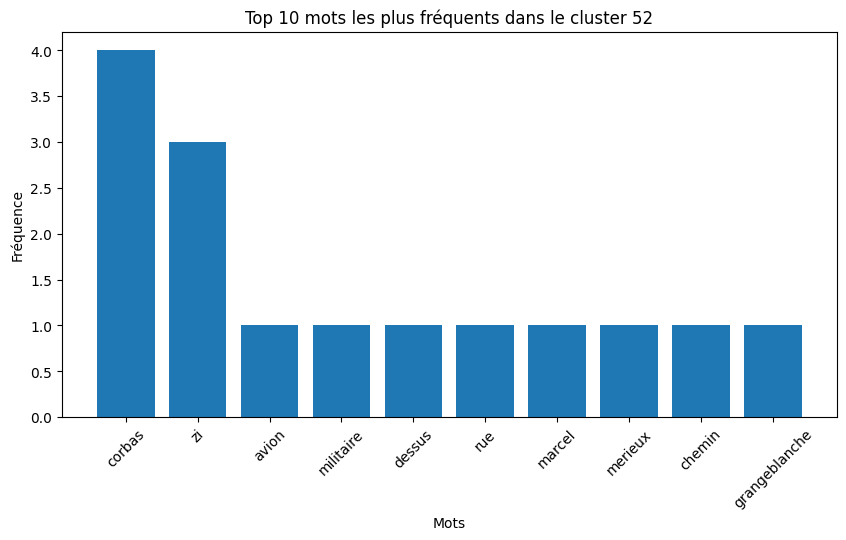

Cluster 53: [('quirky', 2), ('at', 2), ('unis', 1), ('vers', 1), ('luni', 1), ('vert', 1), ('baignade', 1), ('chez', 1), ('robinson', 1), ('ininflammable', 1)]


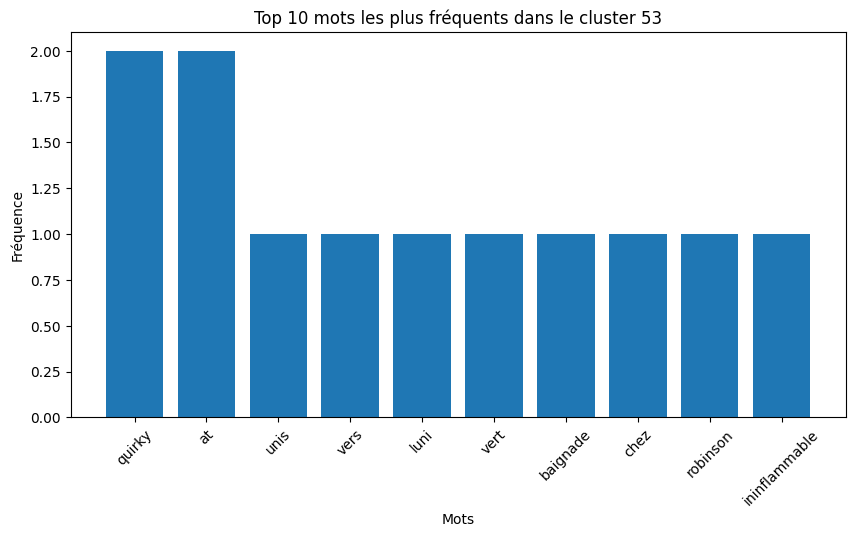

Cluster 54: [('encore', 1), ('peu', 1), ('travail', 1), ('...', 1)]


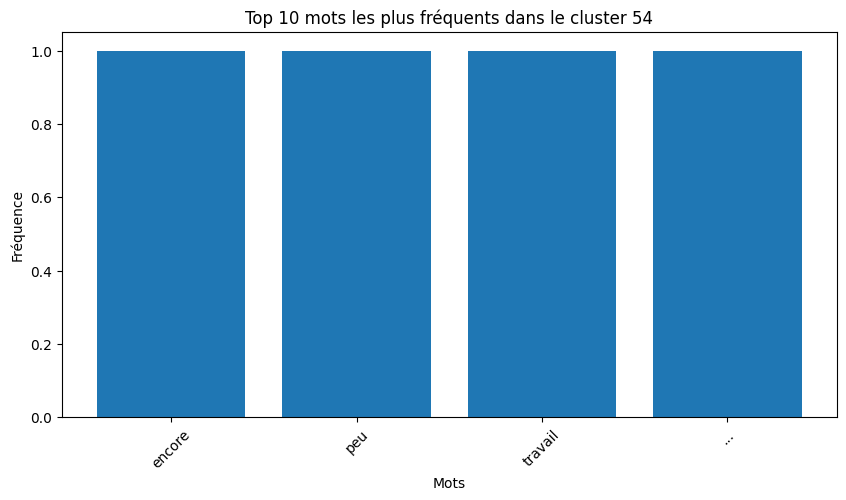

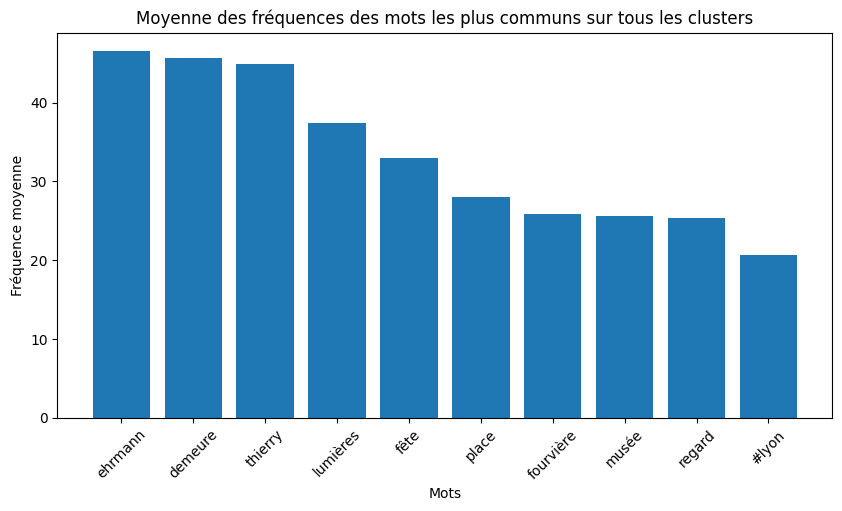

In [35]:
# Exemple d'utilisation (df_sample est le DataFrame contenant les données)
cluster_top_words = get_top_words_by_cluster(df_sample, 'cluster', ' title')
average_top_words = get_average_top_words(cluster_top_words)

# Affichage des résultats et plots
print("\nTop mots par cluster:")
for cluster, words in cluster_top_words.items():
    print(f"Cluster {cluster}: {words}")
    word_counter = Counter(dict(words))
    plot_word_frequencies(word_counter, cluster)

plot_average_word_frequencies(average_top_words)


In [36]:
# Importation de spaCy
import spacy

# Charger le modèle français de spaCy
nlp = spacy.load("fr_core_news_sm")

# Ajuster la limite de longueur pour éviter l'erreur liée à de longs textes
nlp.max_length = 3000000

# Fonction pour tokeniser avec spaCy en traitant le texte par morceaux

def spacy_tokenize_column(column, chunk_size=500000):
    text = column.str.cat(sep=' ')
    tokens = []
    for i in range(0, len(text), chunk_size):
        doc = nlp(text[i:i+chunk_size])
        tokens.extend([token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.like_num])
    return tokens

# Identifier les mots les plus fréquents dans chaque cluster avec spaCy
def get_top_words_by_cluster_spacy(df, cluster_col, text_col, top_n=10):
    clusters = df[cluster_col].unique()
    cluster_top_words = {}

    for cluster in clusters:
        cluster_data = df[df[cluster_col] == cluster][text_col]
        tokens = spacy_tokenize_column(cluster_data)
        word_counter = Counter(tokens)
        cluster_top_words[cluster] = word_counter.most_common(top_n)

    return cluster_top_words

# Calculer la moyenne de fréquence des mots les plus communs sur tous les clusters
def get_average_top_words_spacy(cluster_top_words):
    word_frequencies = Counter()
    cluster_count = len(cluster_top_words)

    for words in cluster_top_words.values():
        for word, freq in words:
            word_frequencies[word] += freq

    # Moyenne des fréquences
    average_frequencies = {word: freq / cluster_count for word, freq in word_frequencies.items()}
    return average_frequencies

# Exemple d'utilisation (df_sample est le DataFrame contenant les données)
cluster_top_words_spacy = get_top_words_by_cluster_spacy(df_sample, 'cluster', ' title')
average_top_words_spacy = get_average_top_words_spacy(cluster_top_words_spacy)

# Affichage des résultats
print("\nTop mots par cluster (spaCy):")
for cluster, words in cluster_top_words_spacy.items():
    print(f"Cluster {cluster}: {words}")

print("\nMoyenne des fréquences des mots les plus communs sur tous les clusters (spaCy):")
for word, avg_freq in sorted(average_top_words_spacy.items(), key=lambda x: x[1], reverse=True):
    print(f"{word}: {avg_freq:.2f}")



Top mots par cluster (spaCy):
Cluster -1: [('Lyon', 21555), ('France', 5292), ('Chaos', 4637), ('of', 3746), ('Ehrmann', 2591), ('demeure', 2551), ('by', 2403), ('thierry', 2335), ('abode', 2168), ('the', 1981)]
Cluster 1: [('Touch', 1024), ('Japan', 1013), ('Lyon', 522), ('Concours', 335), ('30-', 260), ('eurexpo', 258), ('Cosplay', 229), ('cosplayer', 191), ('cosplay', 172), ('international', 119)]
Cluster 2: [('grand', 43), ('Cormoran', 39), ('Phalacrocorax', 36), ('carbo', 36), ('cendrer', 30), ('Grèbe', 30), ('huppé', 30), ('héron', 29), ('ardea', 28), ('cinerea', 28)]
Cluster 3: [('Moderne', 26), ('epicerie', 24), ("@l'", 19), ('27/03/19', 19), ('radio', 15), ('Lyon', 13), ('The', 13), ('elvi', 13), ('Sleaford', 8), ('Mods', 8)]
Cluster 4: [('mont-blanc', 4), ('mont', 3), ('thou', 3), ('Lyon', 2), ('Mont', 2), ('Cindre', 2), ('Nord', 1), ('lumière', 1), ('agglo', 1), ('lyonnais', 1)]
Cluster 5: [('sauvagie', 38), ('Mésange', 14), ('Abeille', 11), ('long', 11), ('Flowers', 10), (


Top mots par cluster (spaCy):
Cluster -1: [('Lyon', 21555), ('France', 5292), ('Chaos', 4637), ('of', 3746), ('Ehrmann', 2591), ('demeure', 2551), ('by', 2403), ('thierry', 2335), ('abode', 2168), ('the', 1981)]
Cluster 1: [('Touch', 1024), ('Japan', 1013), ('Lyon', 522), ('Concours', 335), ('30-', 260), ('eurexpo', 258), ('Cosplay', 229), ('cosplayer', 191), ('cosplay', 172), ('international', 119)]
Cluster 2: [('grand', 43), ('Cormoran', 39), ('Phalacrocorax', 36), ('carbo', 36), ('cendrer', 30), ('Grèbe', 30), ('huppé', 30), ('héron', 29), ('ardea', 28), ('cinerea', 28)]
Cluster 3: [('Moderne', 26), ('epicerie', 24), ("@l'", 19), ('27/03/19', 19), ('radio', 15), ('Lyon', 13), ('The', 13), ('elvi', 13), ('Sleaford', 8), ('Mods', 8)]
Cluster 4: [('mont-blanc', 4), ('mont', 3), ('thou', 3), ('Lyon', 2), ('Mont', 2), ('Cindre', 2), ('Nord', 1), ('lumière', 1), ('agglo', 1), ('lyonnais', 1)]
Cluster 5: [('sauvagie', 38), ('Mésange', 14), ('Abeille', 11), ('long', 11), ('Flowers', 10), (

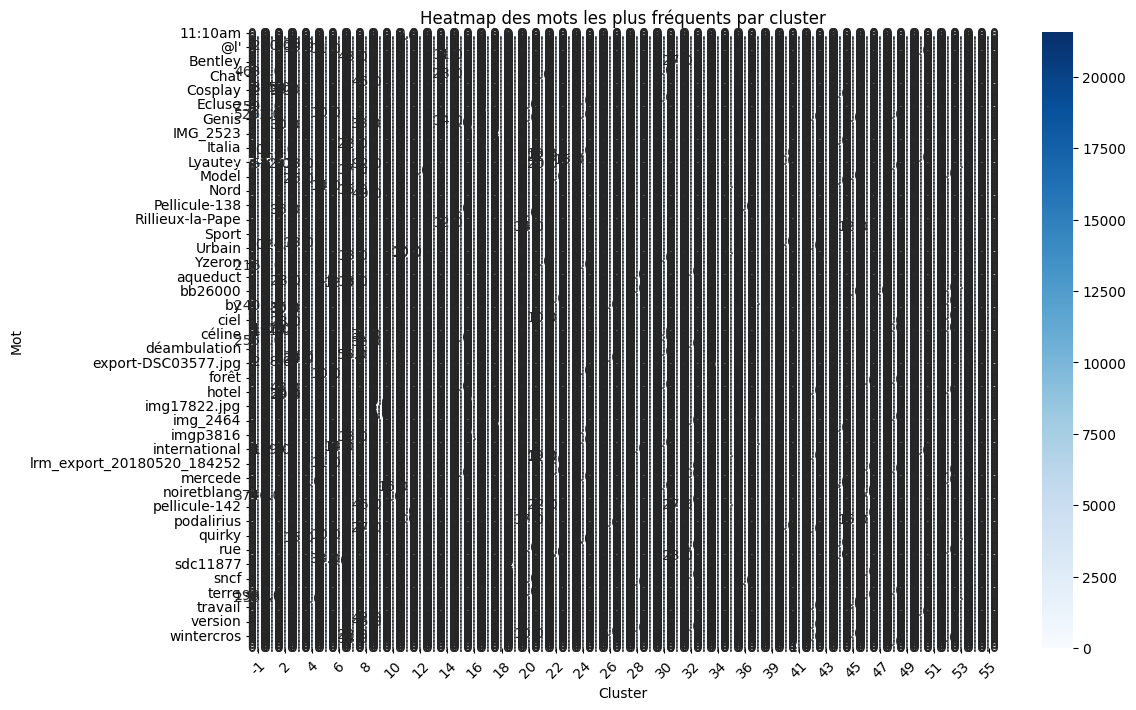

In [37]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Fonction pour afficher une heatmap des mots par cluster
def plot_word_heatmap(cluster_top_words):
    data = []
    for cluster, words in cluster_top_words.items():
        for word, freq in words:
            data.append([cluster, word, freq])
    
    df_heatmap = pd.DataFrame(data, columns=['Cluster', 'Mot', 'Fréquence'])
    df_pivot = df_heatmap.pivot(index='Mot', columns='Cluster', values='Fréquence').fillna(0)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_pivot, cmap="Blues", annot=True, fmt=".1f")
    plt.title("Heatmap des mots les plus fréquents par cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Mot")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Exemple d'utilisation (df_sample est le DataFrame contenant les données)
cluster_top_words_spacy = get_top_words_by_cluster_spacy(df_sample, 'cluster', ' title')
average_top_words_spacy = get_average_top_words_spacy(cluster_top_words_spacy)

# Affichage des résultats
print("\nTop mots par cluster (spaCy):")
for cluster, words in cluster_top_words_spacy.items():
    print(f"Cluster {cluster}: {words}")

print("\nMoyenne des fréquences des mots les plus communs sur tous les clusters (spaCy):")
for word, avg_freq in sorted(average_top_words_spacy.items(), key=lambda x: x[1], reverse=True):
    print(f"{word}: {avg_freq:.2f}")

# Affichage de la heatmap des mots par cluster
plot_word_heatmap(cluster_top_words_spacy)



Top mots par cluster (spaCy):
Cluster -1: [('Lyon', 21555), ('France', 5292), ('Chaos', 4637), ('of', 3746), ('Ehrmann', 2591), ('demeure', 2551), ('by', 2403), ('thierry', 2335), ('abode', 2168), ('the', 1981)]
Cluster 1: [('Touch', 1024), ('Japan', 1013), ('Lyon', 522), ('Concours', 335), ('30-', 260), ('eurexpo', 258), ('Cosplay', 229), ('cosplayer', 191), ('cosplay', 172), ('international', 119)]
Cluster 2: [('grand', 43), ('Cormoran', 39), ('Phalacrocorax', 36), ('carbo', 36), ('cendrer', 30), ('Grèbe', 30), ('huppé', 30), ('héron', 29), ('ardea', 28), ('cinerea', 28)]
Cluster 3: [('Moderne', 26), ('epicerie', 24), ("@l'", 19), ('27/03/19', 19), ('radio', 15), ('Lyon', 13), ('The', 13), ('elvi', 13), ('Sleaford', 8), ('Mods', 8)]
Cluster 4: [('mont-blanc', 4), ('mont', 3), ('thou', 3), ('Lyon', 2), ('Mont', 2), ('Cindre', 2), ('Nord', 1), ('lumière', 1), ('agglo', 1), ('lyonnais', 1)]
Cluster 5: [('sauvagie', 38), ('Mésange', 14), ('Abeille', 11), ('long', 11), ('Flowers', 10), (

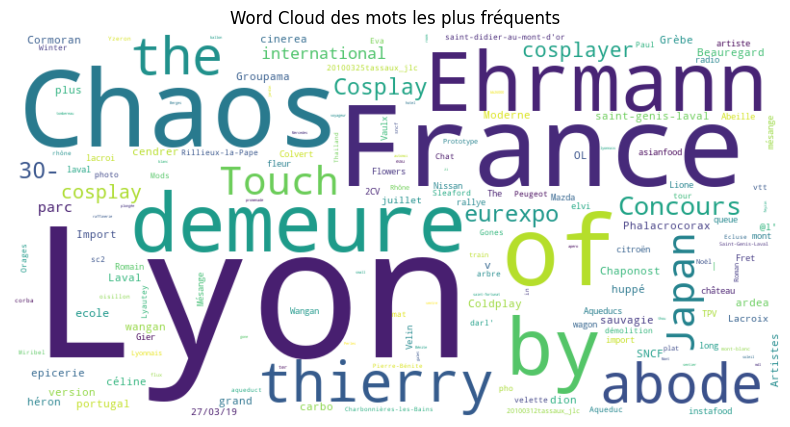

In [38]:
# Importation de spaCy et des bibliothèques de visualisation
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

# Charger le modèle français de spaCy
nlp = spacy.load("fr_core_news_sm")

# Ajuster la limite de longueur pour éviter l'erreur liée à de longs textes
nlp.max_length = 3000000

# Fonction pour tokeniser avec spaCy en traitant le texte par morceaux
def spacy_tokenize_column(column, chunk_size=500000):
    text = column.str.cat(sep=' ')
    tokens = []
    for i in range(0, len(text), chunk_size):
        doc = nlp(text[i:i+chunk_size])
        tokens.extend([token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.like_num])
    return tokens

# Identifier les mots les plus fréquents dans chaque cluster avec spaCy
def get_top_words_by_cluster_spacy(df, cluster_col, text_col, top_n=10):
    clusters = df[cluster_col].unique()
    cluster_top_words = {}

    for cluster in clusters:
        cluster_data = df[df[cluster_col] == cluster][text_col]
        tokens = spacy_tokenize_column(cluster_data)
        word_counter = Counter(tokens)
        cluster_top_words[cluster] = word_counter.most_common(top_n)

    return cluster_top_words

# Calculer la moyenne de fréquence des mots les plus communs sur tous les clusters
def get_average_top_words_spacy(cluster_top_words):
    word_frequencies = Counter()
    cluster_count = len(cluster_top_words)

    for words in cluster_top_words.values():
        for word, freq in words:
            word_frequencies[word] += freq

    # Moyenne des fréquences
    average_frequencies = {word: freq / cluster_count for word, freq in word_frequencies.items()}
    return average_frequencies

# Fonction pour afficher un word cloud des mots les plus fréquents
def plot_word_cloud(average_top_words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(average_top_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud des mots les plus fréquents")
    plt.show()

# Exemple d'utilisation (df_sample est le DataFrame contenant les données)
cluster_top_words_spacy = get_top_words_by_cluster_spacy(df_sample, 'cluster', ' title')
average_top_words_spacy = get_average_top_words_spacy(cluster_top_words_spacy)

# Affichage des résultats
print("\nTop mots par cluster (spaCy):")
for cluster, words in cluster_top_words_spacy.items():
    print(f"Cluster {cluster}: {words}")

print("\nMoyenne des fréquences des mots les plus communs sur tous les clusters (spaCy):")
for word, avg_freq in sorted(average_top_words_spacy.items(), key=lambda x: x[1], reverse=True):
    print(f"{word}: {avg_freq:.2f}")

# Affichage du word cloud
plot_word_cloud(average_top_words_spacy)


In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Charger les données (assurez-vous que df contient vos données)
# df = pd.read_csv('votre_fichier.csv')

# Supprimer les espaces au début et à la fin des noms de colonnes
df_base.columns = df_base.columns.str.strip()

# Vérifier si les colonnes nécessaires existent
required_columns = ['date_taken_year', 'date_taken_month', 'date_taken_day']
missing_columns = [col for col in required_columns if col not in df_base.columns]

if missing_columns:
    print(f"Les colonnes suivantes sont absentes : {missing_columns}")
else:
    # Supprimer les lignes avec des valeurs NaN dans les colonnes de date
    df_base = df_base.dropna(subset=required_columns)
    # Convertir les colonnes de date en un format exploitable
    df_base['date_taken'] = pd.to_datetime(df_base[['date_taken_year', 'date_taken_month', 'date_taken_day']])

    # Ajouter une colonne pour le jour de la semaine
    df_base['day_of_week'] = df_base['date_taken'].dt.day_name()

    # Compter le nombre de photos prises par jour de la semaine et par mois
    heatmap_data = df_base.groupby(['date_taken_month', 'day_of_week']).size().unstack().fillna(0)

    # Réorganiser l'ordre des jours de la semaine
    order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    heatmap_data = heatmap_data.reindex(columns=order, fill_value=0)

    # Tracer la heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)
    plt.title("Répartition des photos par jour de la semaine et par mois")
    plt.xlabel("Jour de la semaine")
    plt.ylabel("Mois")
    plt.show()


Les colonnes suivantes sont absentes : [' date_taken_year', ' date_taken_month', ' date_taken_day']


In [50]:
print(df_base.columns)


Index(['id', 'user', 'lat', 'long', 'tags', 'title', 'date_taken_minute',
       'date_taken_hour', 'date_taken_day', 'date_taken_month',
       'date_taken_year', 'date_upload_minute', 'date_upload_hour',
       'date_upload_day', 'date_upload_month', 'date_upload_year'],
      dtype='object')
